In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
%%time
df=pd.read_csv("train.csv",nrows=5000000,dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32',
 'HasDetections': 'int32'})

Wall time: 2min 33s


In [3]:
initial_memory=df.memory_usage().sum()

In [4]:
df.shape

(5000000, 83)

In [5]:
for col in df.columns:
    #print("Number of Unique values : "+str(col)+" :"+str(df[col].dtype),df[col].nunique())
    if df[col].nunique()==2:
        try:
            df[col]=df[col].astype('int8')
        except:
            continue
    else:
        continue

In [6]:
print("Number of Columns : ",len(df.columns))
print("Number of Rows : ",len(df))
print("Memory Usage : ",df.memory_usage().sum())

Number of Columns :  83
Number of Rows :  5000000
Memory Usage :  1028240968


In [7]:
l=df.columns[df.isnull().any()].tolist()

In [8]:
drop_list=[]
delete_rows_list=[]
treat_list=[]
for column in l:
    #print("Number of Null Values for : "+str(column)+" "+str(df[column].isnull().sum())+" "+str(df[column].isnull().sum()*100/len(df))+"%")
    if df[column].isnull().sum()*100/len(df)>=60:#dropping columns with more than 30% of missing values
        drop_list.append(column)
    elif df[column].isnull().sum()*100/len(df)<=30:#Deleting rows having columns upto 30% missing values
        delete_rows_list.append(column)
    else:#Treating null values in the remainder of the columns
        treat_list.append(column)

In [9]:
drop_list

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [10]:
delete_rows_list

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsFlightsDisabled',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedC

In [11]:
treat_list

['OrganizationIdentifier', 'SmartScreen']

In [12]:
df.drop(columns=drop_list,axis=1,inplace=True)

In [13]:
df.shape

(5000000, 76)

In [14]:
#df.dropna(subset=delete_rows_list,axis=0,inplace=True)

In [15]:
import statistics

In [16]:
column_value_replacements={}
#number_of_unique={}
#equal_col=[]
for col in df.columns:
    if col=='MachineIdentifier':
        continue
    elif col in df.select_dtypes(include=['category','object']).columns:
        column_value_replacements[col]=statistics.mode(df[col])
#        number_of_unique[col]=df[col].nunique()
    else:
        column_value_replacements[col]=np.nanmedian(df[col])

In [17]:
df.shape

(5000000, 76)

In [18]:
df.OrganizationIdentifier.isnull().sum()

1541153

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


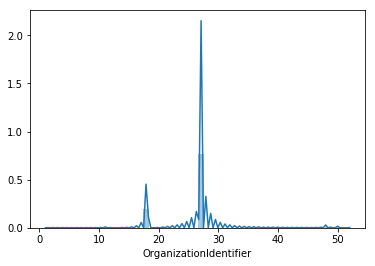

In [19]:
sns.distplot(df.OrganizationIdentifier.fillna(np.nanmedian(df['OrganizationIdentifier'])))

In [20]:
df.SmartScreen.isnull().sum()

1780564

In [21]:
statistics.mode(df.SmartScreen)

'RequireAdmin'

In [22]:
df.SmartScreen.fillna(statistics.mode(df.SmartScreen),inplace=True)

In [23]:
df.OrganizationIdentifier.fillna(np.nanmedian(df.OrganizationIdentifier),inplace=True)

In [24]:
df.shape

(5000000, 76)

In [25]:
%%time
for col in df.columns[df.isnull().any()]:
    df[col].fillna(column_value_replacements[col],inplace=True)

Wall time: 10.8 s


In [26]:
df.isnull().sum().sort_values(ascending=False).head()

HasDetections           0
SMode                   0
OsBuild                 0
OsSuite                 0
OsPlatformSubRelease    0
dtype: int64

In [27]:
#for col in df.columns:
#    print("Number of unique values for : "+str(col)+" :",df[col].nunique())

In [28]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [29]:
df.select_dtypes(include='int64').columns

Index([], dtype='object')

In [30]:
df.select_dtypes(include='float64').columns

Index([], dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
cols=df.columns.tolist()

In [33]:
df[cols[1]].nunique()

6

In [34]:
df[cols[1]].unique()

[win8defender, mse, mseprerelease, windowsintune, fep, scep]
Categories (6, object): [win8defender, mse, mseprerelease, windowsintune, fep, scep]

In [35]:
df[cols[1]].value_counts()

win8defender     4946592
mse                53352
mseprerelease         32
scep                  13
fep                    6
windowsintune          5
Name: ProductName, dtype: int64

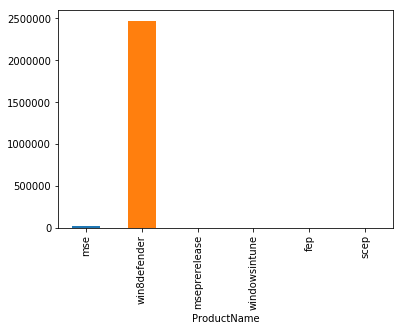

In [36]:
fig,ax=plt.subplots()
df[df.HasDetections==1].groupby(cols[1]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [37]:
df[df.HasDetections==1].groupby(cols[1]).count()['MachineIdentifier']

ProductName
mse                25812
win8defender     2472472
mseprerelease         18
windowsintune          0
fep                    3
scep                   7
Name: MachineIdentifier, dtype: int64

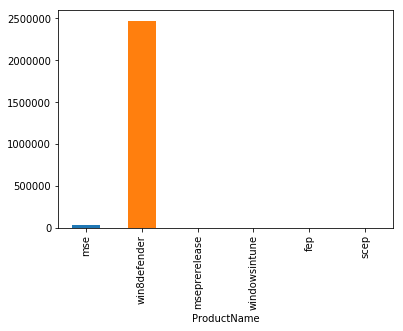

In [38]:
fig,ax=plt.subplots()
df[df.HasDetections==0].groupby(cols[1]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [39]:
df[df.HasDetections==0].groupby(cols[1]).count()['MachineIdentifier']

ProductName
mse                27540
win8defender     2474120
mseprerelease         14
windowsintune          5
fep                    3
scep                   6
Name: MachineIdentifier, dtype: int64

In [40]:
df.drop(columns=cols[1],axis=1,inplace=True)

In [41]:
df[cols[2]].nunique()

66

In [42]:
df[cols[2]].unique()

[1.1.15100.1, 1.1.14600.4, 1.1.15200.1, 1.1.15300.6, 1.1.13504.0, ..., 1.1.11502.0, 1.1.9700.0, 1.1.11602.0, 1.1.13503.0, 1.1.13301.0]
Length: 66
Categories (66, object): [1.1.15100.1, 1.1.14600.4, 1.1.15200.1, 1.1.15300.6, ..., 1.1.9700.0, 1.1.11602.0, 1.1.13503.0, 1.1.13301.0]

In [43]:



cols[2]

'EngineVersion'

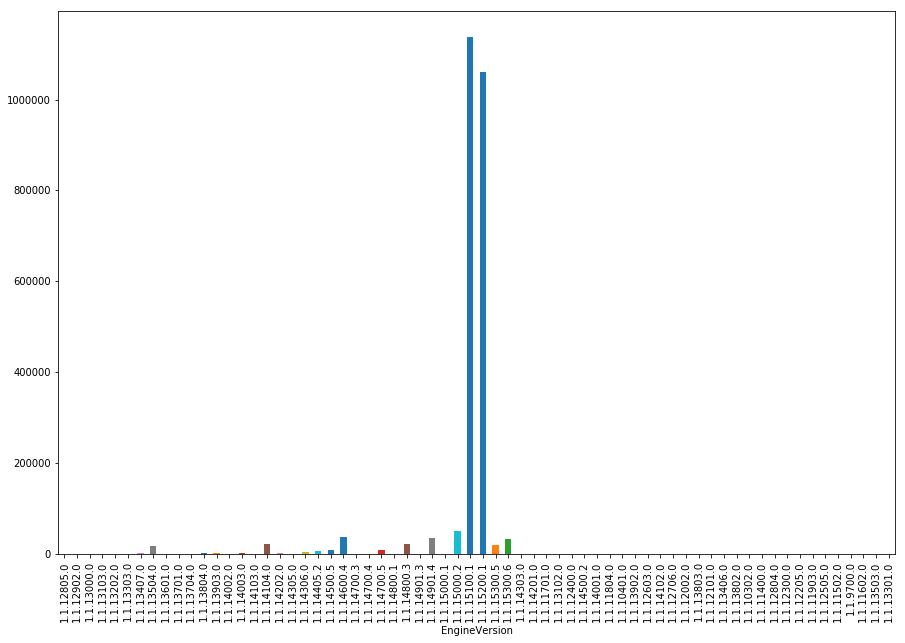

In [44]:
fig,ax=plt.subplots(figsize=(15,10))
df[df.HasDetections==1].groupby(cols[2]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [45]:
t1=df[df.HasDetections==1].groupby(cols[2]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)

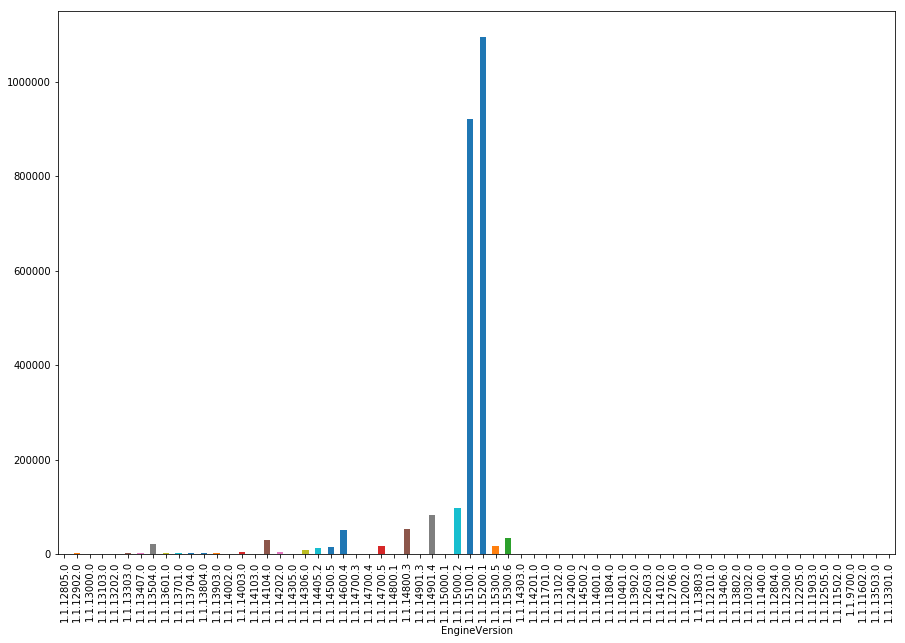

In [46]:
fig,ax=plt.subplots(figsize=(15,10))
df[df.HasDetections==0].groupby(cols[2]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [47]:
t2=df[df.HasDetections==0].groupby(cols[2]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)

In [48]:
t1.rename(columns={'MachineIdentifier':'NOM_affected_EngineVersion'},inplace=True)
t2.rename(columns={'MachineIdentifier':'NOM_unaffected_EngineVersion'},inplace=True)
t=t1.merge(t2,on='EngineVersion',how='inner')

In [49]:
t['EngineVersion_Percent_Affected']=np.round(t['NOM_affected_EngineVersion']*100/(t['NOM_affected_EngineVersion']+t['NOM_unaffected_EngineVersion']))

In [50]:
t.drop(columns=['NOM_affected_EngineVersion','NOM_unaffected_EngineVersion'],inplace=True)

In [51]:
t.sort_values(by='EngineVersion_Percent_Affected',ascending=False,inplace=True)

Text(0,0.5,'Percentage of Affected Machines')

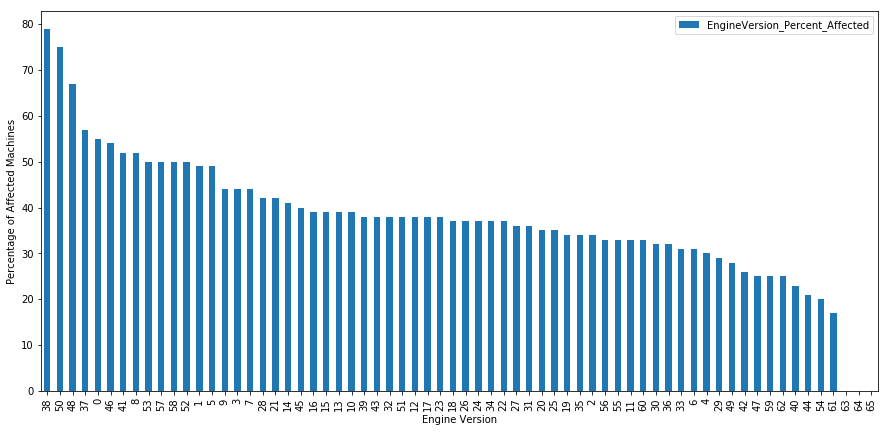

In [52]:
fig,ax=plt.subplots(figsize=(15,7))
t.plot(kind='bar',ax=ax)
ax.set_xlabel("Engine Version")
ax.set_ylabel("Percentage of Affected Machines")

In [53]:
df[cols[3]].nunique()

107

In [54]:
df[cols[3]].unique()

[4.18.1807.18075, 4.13.17134.1, 4.9.218.0, 4.18.1806.18062, 4.18.1809.2, ..., 4.17.17686.1004, 4.5.212.0, 4.13.17134.226, 4.7.209.0, 4.13.17618.1000]
Length: 107
Categories (107, object): [4.18.1807.18075, 4.13.17134.1, 4.9.218.0, 4.18.1806.18062, ..., 4.5.212.0, 4.13.17134.226, 4.7.209.0, 4.13.17618.1000]

In [55]:
df[cols[3]].value_counts()

4.18.1807.18075     2880360
4.18.1806.18062      476935
4.12.16299.15        202080
4.10.209.0           153202
4.13.17134.1         143870
4.16.17656.18052     131952
4.13.17134.228       126604
4.8.10240.17443      115137
4.9.10586.1106       114046
4.14.17639.18041     108853
4.12.17007.18022      66347
4.9.10586.0           62886
4.11.15063.447        51363
4.10.14393.0          43230
4.11.15063.0          38807
4.12.17007.18011      34515
4.14.17613.18039      29699
4.8.10240.16384       25558
4.11.15063.1155       24699
4.10.14393.1794       24640
4.9.10586.494         13856
4.10.14393.1198       13231
4.9.10586.672         12593
4.13.17134.191        11441
4.18.1809.2            7742
4.12.17007.17123       7690
4.10.14393.1613        7616
4.9.10586.589          7400
4.13.17134.112         7087
4.9.10586.1045         5894
                     ...   
4.11.15063.994           40
4.9.10586.456            33
4.17.17682.1000          33
4.15.17666.1000          23
4.18.1806.20033     

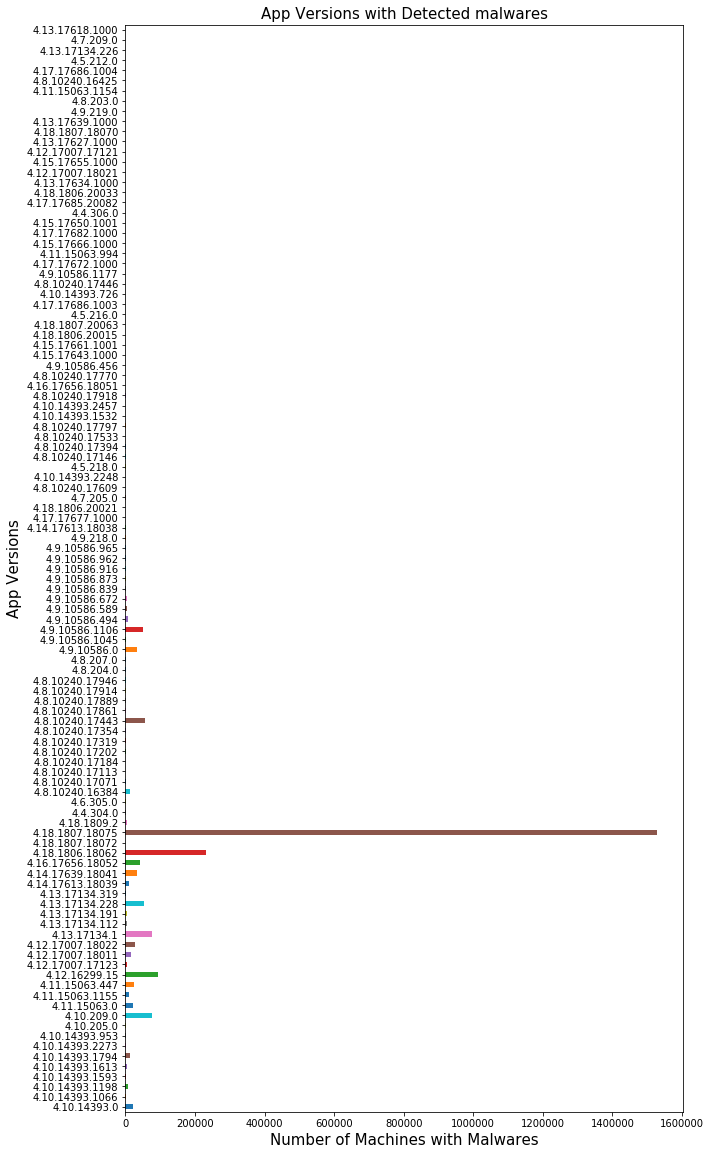

In [56]:
fig,ax=plt.subplots(figsize=(10,20))
df[df.HasDetections==1].groupby(cols[3]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)
ax.set_title("App Versions with Detected malwares",fontsize=15)
ax.set_xlabel("Number of Machines with Malwares",fontsize=15)
ax.set_ylabel("App Versions",fontsize=15)
fig.savefig(str(cols[3])+"_HasDetections_1"+".jpg")

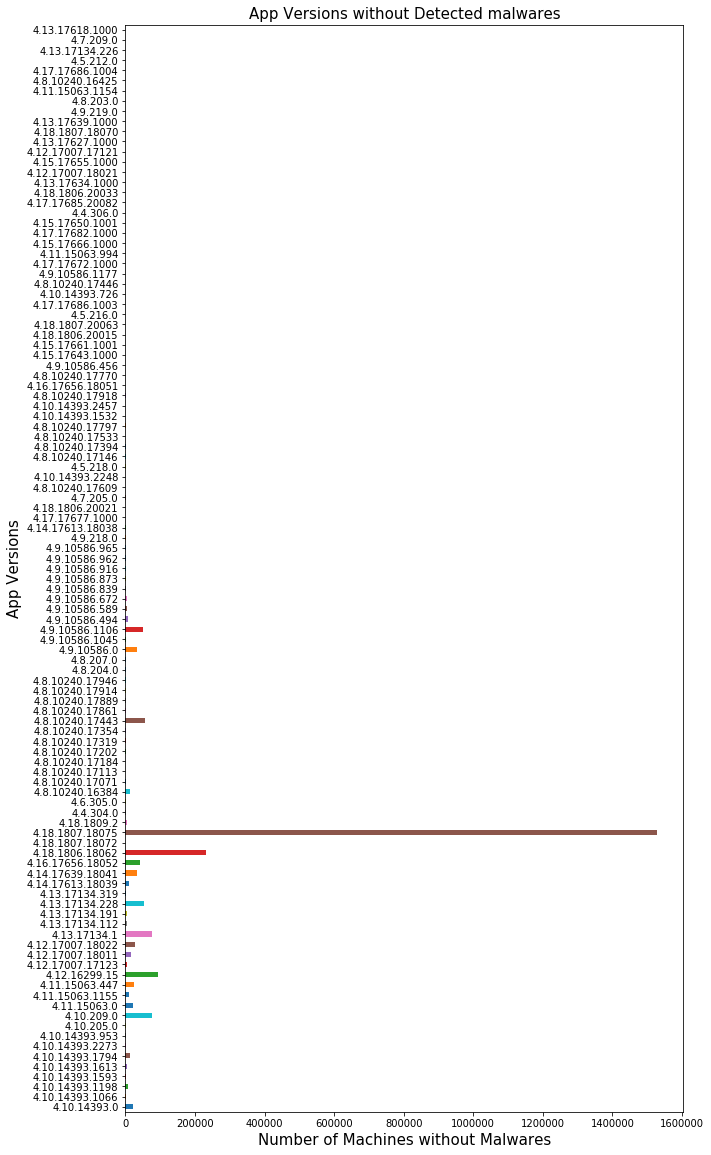

In [57]:
fig,ax=plt.subplots(figsize=(10,20))
df[df.HasDetections==1].groupby(cols[3]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)
ax.set_title("App Versions without Detected malwares",fontsize=15)
ax.set_xlabel("Number of Machines without Malwares",fontsize=15)
ax.set_ylabel("App Versions",fontsize=15)
fig.savefig(str(cols[3])+"_HasDetections_0"+".jpg")

In [58]:
u1=df[df.HasDetections==1].groupby(cols[3]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)
u2=df[df.HasDetections==0].groupby(cols[3]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)

In [59]:
u1.rename(columns={'MachineIdentifier':'NOM_affected_AppVersion'},inplace=True)
u2.rename(columns={'MachineIdentifier':'NOM_unaffected_AppVersion'},inplace=True)
u=u1.merge(u2,on='AppVersion',how='outer')

In [60]:
u['AppVersion_Percent_Affected']=np.round(u['NOM_affected_AppVersion']*100/(u['NOM_affected_AppVersion']+u['NOM_unaffected_AppVersion']))

In [61]:
u.drop(columns=['NOM_affected_AppVersion','NOM_unaffected_AppVersion'],inplace=True)

In [62]:
u.sort_values(by='AppVersion_Percent_Affected',ascending=False,inplace=True)

In [63]:
cols[5]

'IsBeta'

In [64]:
df[cols[5]].nunique()

2

In [65]:
df[cols[5]].unique()

array([0, 1], dtype=int64)

In [66]:
df[cols[5]].value_counts()

0    4999960
1         40
Name: IsBeta, dtype: int64

In [67]:
df.drop(columns=['IsBeta'],axis=1,inplace=True)

In [68]:
df[cols[6]].nunique()

7

In [69]:
df[cols[6]].unique()

array([ 7.,  0.,  3.,  5.,  8.,  1., 35.])

In [70]:
df[cols[6]].value_counts()

7.0     4866811
0.0      106983
8.0       12246
5.0       11357
3.0        1671
1.0         920
35.0         12
Name: RtpStateBitfield, dtype: int64

In [71]:
cols[6]

'RtpStateBitfield'

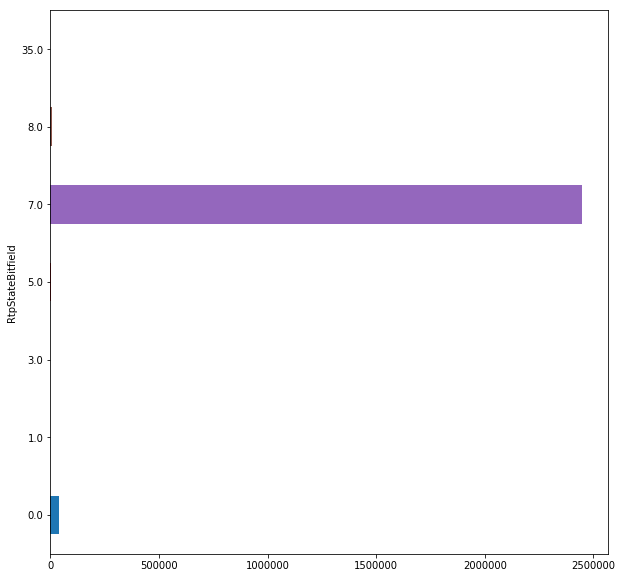

In [72]:
fig,ax=plt.subplots(figsize=(10,10))
df[df.HasDetections==1].groupby(cols[6]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)
#df[df.HasDetections==0].groupby(cols[6]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)

In [73]:
#fig,ax=plt.subplots(figsize=(10,10))
df[df.HasDetections==1].groupby(cols[6]).count()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
RtpStateBitfield,,,,,,,,,,,,,,,,,,,,,
0.0,40191,40191,40191,40191,40191,40191,40191,40191,40191,40191,...,40191,40191,40191,40191,40191,40191,40191,40191,40191,40191
1.0,369,369,369,369,369,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369
3.0,522,522,522,522,522,522,522,522,522,522,...,522,522,522,522,522,522,522,522,522,522
5.0,1710,1710,1710,1710,1710,1710,1710,1710,1710,1710,...,1710,1710,1710,1710,1710,1710,1710,1710,1710,1710
7.0,2446370,2446370,2446370,2446370,2446370,2446370,2446370,2446370,2446370,2446370,...,2446370,2446370,2446370,2446370,2446370,2446370,2446370,2446370,2446370,2446370
8.0,9139,9139,9139,9139,9139,9139,9139,9139,9139,9139,...,9139,9139,9139,9139,9139,9139,9139,9139,9139,9139
35.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [74]:
df[df.HasDetections==0].groupby(cols[6]).count()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
RtpStateBitfield,,,,,,,,,,,,,,,,,,,,,
0.0,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,...,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792
1.0,551,551,551,551,551,551,551,551,551,551,...,551,551,551,551,551,551,551,551,551,551
3.0,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,...,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149
5.0,9647,9647,9647,9647,9647,9647,9647,9647,9647,9647,...,9647,9647,9647,9647,9647,9647,9647,9647,9647,9647
7.0,2420441,2420441,2420441,2420441,2420441,2420441,2420441,2420441,2420441,2420441,...,2420441,2420441,2420441,2420441,2420441,2420441,2420441,2420441,2420441,2420441
8.0,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,...,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107
35.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [75]:
df[cols[7]].unique()

array([0, 1], dtype=int64)

In [76]:
df[cols[7]].value_counts()

0    4913383
1      86617
Name: IsSxsPassiveMode, dtype: int64

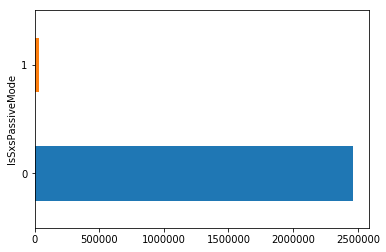

In [77]:
fig,ax=plt.subplots()
df[df.HasDetections==1].groupby(cols[7]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)

In [78]:
#fig,ax=plt.subplots()
df[df.HasDetections==0].groupby(cols[7]).count()['MachineIdentifier']#.plot(kind='barh',ax=ax)

IsSxsPassiveMode
0    2446928
1      54760
Name: MachineIdentifier, dtype: int64

In [79]:
df[df.HasDetections==1].groupby(cols[7]).count()['MachineIdentifier']

IsSxsPassiveMode
0    2466455
1      31857
Name: MachineIdentifier, dtype: int64

In [80]:
df[cols[8]].nunique()

20794

In [81]:
df[cols[8]].unique()

array([53447., 43927., 46413., ..., 57025., 69153., 30855.])

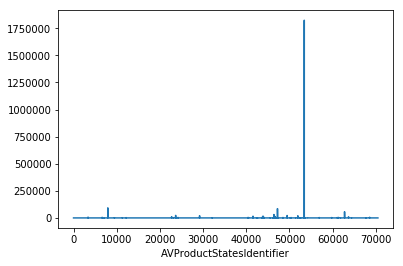

In [82]:
df[df.HasDetections==1].sort_values(by=cols[8]).groupby(cols[8]).count()['MachineIdentifier'].plot()

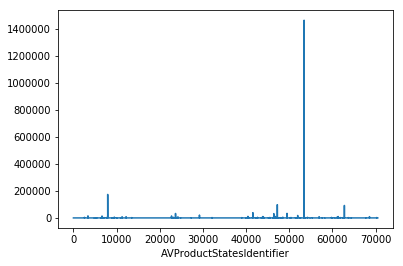

In [83]:
df[df.HasDetections==0].sort_values(by=cols[8]).groupby(cols[8]).count()['MachineIdentifier'].plot()

In [84]:
cols[9]

'AVProductsInstalled'

In [85]:
df[cols[9]].nunique()

8

In [86]:
df[cols[9]].unique()

array([1., 2., 3., 5., 4., 6., 7., 0.])

In [87]:
df[cols[9]].value_counts()

1.0    3499974
2.0    1378045
3.0     116847
4.0       4851
5.0        267
6.0         14
7.0          1
0.0          1
Name: AVProductsInstalled, dtype: int64

In [88]:
df[df.HasDetections==1].groupby(cols[9]).count()['MachineIdentifier']

AVProductsInstalled
1.0    1916062
2.0     546695
3.0      34203
4.0       1279
5.0         69
6.0          3
7.0          1
Name: MachineIdentifier, dtype: int64

In [89]:
df[df.HasDetections==0].groupby(cols[9]).count()['MachineIdentifier']

AVProductsInstalled
0.0          1
1.0    1583912
2.0     831350
3.0      82644
4.0       3572
5.0        198
6.0         11
Name: MachineIdentifier, dtype: int64

In [90]:
cols[10]

'AVProductsEnabled'

In [91]:
df[cols[10]].unique()

array([1., 2., 0., 4., 3., 5.])

In [92]:
df[cols[10]].value_counts()

1.0    4870136
2.0     111548
0.0      14673
3.0       3365
4.0        265
5.0         13
Name: AVProductsEnabled, dtype: int64

In [93]:
df[df.HasDetections==1][cols[10]].value_counts()

1.0    2454450
2.0      37510
0.0       5196
3.0       1072
4.0         83
5.0          1
Name: AVProductsEnabled, dtype: int64

In [94]:
df[df.HasDetections==0][cols[10]].value_counts()

1.0    2415686
2.0      74038
0.0       9477
3.0       2293
4.0        182
5.0         12
Name: AVProductsEnabled, dtype: int64

In [95]:
cols[11]

'HasTpm'

In [96]:
df[cols[11]].unique()

array([1, 0], dtype=int64)

In [97]:
df[cols[11]].value_counts()

1    4939646
0      60354
Name: HasTpm, dtype: int64

In [98]:
df[df.HasDetections==1][cols[11]].value_counts()

1    2469645
0      28667
Name: HasTpm, dtype: int64

In [99]:
df[df.HasDetections==0][cols[11]].value_counts()

1    2470001
0      31687
Name: HasTpm, dtype: int64

In [100]:
cols[12]

'CountryIdentifier'

In [101]:
df[cols[12]].nunique()

222

In [102]:
df[cols[12]].unique()

array([ 29,  93,  86,  88,  18,  97,  78, 164, 107,  80, 171, 169, 157,
       178, 158,  43, 147,  12, 203, 205, 199,   9,  68, 201, 141,  35,
       159, 160, 129,  44, 207,  15,  89,   3, 108,  55, 195, 214, 148,
       100,  16, 155, 190,  95,  53, 204,  94,   8, 152, 110, 184, 132,
       122,  57,  39,  51,  59,  70,  52, 121, 149, 142,  41,   2, 179,
       180,  27, 103, 167, 101, 220, 119, 173,  84, 166,  60,  56, 150,
        99,  66,  24, 151,  19,  91,  81,  50, 168, 162,  21, 154,  45,
       137,   7, 139, 123,  37, 177,  33, 104, 188, 202, 211, 112, 118,
       144, 115, 221,  98,  85, 208,  11,  40,  58, 120, 170, 102, 145,
       215, 143,  62, 163,  48, 222, 131, 156, 124,  90, 106,  28,  73,
        30,  63,  26,  22, 117, 183,  49,  96,  61, 185, 138, 172, 133,
       127,  87,  46,  42,   5,  71,  32, 198, 197,  17,   6, 113,  83,
        36, 135, 153, 206,  25,  38, 219, 140,  34,  67,  23, 130, 175,
       136,  13, 111,  74,  47, 192, 210, 146,  76, 191, 125, 17

In [103]:
v1=df[df.HasDetections==1].groupby(cols[12]).count()['MachineIdentifier'].reset_index()

v2=df[df.HasDetections==0].groupby(cols[12]).count()['MachineIdentifier'].reset_index()

v1.rename(columns={'MachineIdentifier':'NOM_affected_CountryIdentfier'},inplace=True)
v2.rename(columns={'MachineIdentifier':'NOM_unaffected_CountryIdentfier'},inplace=True)

v=v1.merge(v2,on='CountryIdentifier',how='outer')

v['Percent_affected_CountryIdentifier']=np.round(v['NOM_affected_CountryIdentfier']*100/(v['NOM_affected_CountryIdentfier']+v['NOM_unaffected_CountryIdentfier']))

v.drop(columns=['NOM_affected_CountryIdentfier','NOM_unaffected_CountryIdentfier'],inplace=True)

v.sort_values(by='Percent_affected_CountryIdentifier',ascending=False,inplace=True)

In [104]:
cols[13]

'CityIdentifier'

In [105]:
w1=df[df.HasDetections==1].groupby(cols[13]).count()['MachineIdentifier'].reset_index()

w2=df[df.HasDetections==0].groupby(cols[13]).count()['MachineIdentifier'].reset_index()

w1.rename(columns={'MachineIdentifier':'NOM_affected_CityIdentfier'},inplace=True)
w2.rename(columns={'MachineIdentifier':'NOM_unaffected_CityIdentfier'},inplace=True)

w=w1.merge(w2,on=cols[13],how='outer')

w['Percent_affected_CityIdentifier']=np.round(w['NOM_affected_CityIdentfier']*100/(w['NOM_affected_CityIdentfier']+w['NOM_unaffected_CityIdentfier']))

w.drop(columns=['NOM_affected_CityIdentfier','NOM_unaffected_CityIdentfier'],inplace=True)

w.sort_values(by='Percent_affected_CityIdentifier',ascending=False,inplace=True)

In [106]:
cols[14]

'OrganizationIdentifier'

In [107]:
df[cols[14]].nunique()

47

In [108]:
z1=df[df.HasDetections==1].groupby(cols[14]).count()['MachineIdentifier'].reset_index()

z2=df[df.HasDetections==0].groupby(cols[14]).count()['MachineIdentifier'].reset_index()

z1.rename(columns={'MachineIdentifier':'NOM_affected_OrganizationIdentfier'},inplace=True)
z2.rename(columns={'MachineIdentifier':'NOM_unaffected_OrganizationIdentfier'},inplace=True)

z=z1.merge(z2,on=cols[14],how='outer')

z['Percent_affected_OrganizationIdentifier']=np.round(z['NOM_affected_OrganizationIdentfier']*100/(z['NOM_affected_OrganizationIdentfier']+z['NOM_unaffected_OrganizationIdentfier']))

z.drop(columns=['NOM_affected_OrganizationIdentfier','NOM_unaffected_OrganizationIdentfier'],inplace=True)

z.sort_values(by='Percent_affected_OrganizationIdentifier',ascending=False,inplace=True)

In [109]:
cols[15]

'GeoNameIdentifier'

In [110]:
df[cols[15]].nunique()

288

In [111]:
a1=df[df.HasDetections==1].groupby(cols[15]).count()['MachineIdentifier'].reset_index()

a2=df[df.HasDetections==0].groupby(cols[15]).count()['MachineIdentifier'].reset_index()

a1.rename(columns={'MachineIdentifier':'NOM_affected_GeoNameIdentfier'},inplace=True)
a2.rename(columns={'MachineIdentifier':'NOM_unaffected_GeoNameIdentfier'},inplace=True)

a=a1.merge(a2,on=cols[15],how='outer')

a['Percent_affected_GeoNameIdentifier']=np.round(a['NOM_affected_GeoNameIdentfier']*100/(a['NOM_affected_GeoNameIdentfier']+a['NOM_unaffected_GeoNameIdentfier']))

a.drop(columns=['NOM_affected_GeoNameIdentfier','NOM_unaffected_GeoNameIdentfier'],inplace=True)

a.sort_values(by='Percent_affected_GeoNameIdentifier',ascending=False,inplace=True)

In [112]:
df[cols[17]].value_counts()

windows10      4829771
windows8        109359
windows7         52851
windows2016       8019
Name: Platform, dtype: int64

In [113]:
b1=df[df.HasDetections==1].groupby(cols[17]).count()['MachineIdentifier'].reset_index()

b2=df[df.HasDetections==0].groupby(cols[17]).count()['MachineIdentifier'].reset_index()

b1.rename(columns={'MachineIdentifier':'NOM_affected_Platform'},inplace=True)
b2.rename(columns={'MachineIdentifier':'NOM_unaffected_Platform'},inplace=True)

b=b1.merge(b2,on=cols[17],how='outer')

b['Percent_affected_Platform']=np.round(b['NOM_affected_Platform']*100/(b['NOM_affected_Platform']+b['NOM_unaffected_Platform']))

b.drop(columns=['NOM_affected_Platform','NOM_unaffected_Platform'],inplace=True)

b.sort_values(by='Percent_affected_Platform',ascending=False,inplace=True)

In [114]:
cols[18]

'Processor'

In [115]:
c1=df[df.HasDetections==1].groupby(cols[18]).count()['MachineIdentifier'].reset_index()

c2=df[df.HasDetections==0].groupby(cols[18]).count()['MachineIdentifier'].reset_index()

c1.rename(columns={'MachineIdentifier':'NOM_affected_Processor'},inplace=True)
c2.rename(columns={'MachineIdentifier':'NOM_unaffected_Processor'},inplace=True)

c=c1.merge(c2,on=cols[18],how='outer')

c['Percent_affected_Processor']=np.round(c['NOM_affected_Processor']*100/(c['NOM_affected_Processor']+c['NOM_unaffected_Processor']))

c.drop(columns=['NOM_affected_Processor','NOM_unaffected_Processor'],inplace=True)

c.sort_values(by='Percent_affected_Processor',ascending=False,inplace=True)

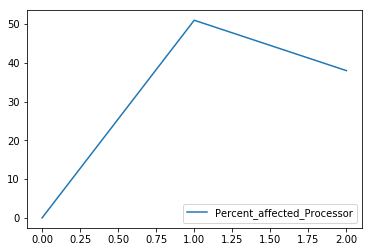

In [116]:
c.sort_index().plot()

In [117]:
df[cols[19]].unique()

[10.0.0.0, 6.1.1.0, 6.3.0.0, 10.0.1.44, 6.1.0.0, ..., 10.0.23.0, 6.3.0.16, 10.0.0.3, 6.3.5.0, 10.0.6.0]
Length: 44
Categories (44, object): [10.0.0.0, 6.1.1.0, 6.3.0.0, 10.0.1.44, ..., 6.3.0.16, 10.0.0.3, 6.3.5.0, 10.0.6.0]

In [118]:
d1=df[df.HasDetections==1].groupby(cols[19]).count()['MachineIdentifier'].reset_index()

d2=df[df.HasDetections==0].groupby(cols[19]).count()['MachineIdentifier'].reset_index()

d1.rename(columns={'MachineIdentifier':'NOM_affected_OsVer'},inplace=True)
d2.rename(columns={'MachineIdentifier':'NOM_unaffected_OsVer'},inplace=True)

d=d1.merge(d2,on=cols[19],how='outer')

d['Percent_affected_OsVer']=np.round(d['NOM_affected_OsVer']*100/(d['NOM_affected_OsVer']+d['NOM_unaffected_OsVer']))

d.drop(columns=['NOM_affected_OsVer','NOM_unaffected_OsVer'],inplace=True)

d.sort_values(by='Percent_affected_OsVer',ascending=False,inplace=True)

In [119]:
cols[20]

'OsBuild'

In [120]:
e1=df[df.HasDetections==1].groupby(cols[20]).count()['MachineIdentifier'].reset_index()

e2=df[df.HasDetections==0].groupby(cols[20]).count()['MachineIdentifier'].reset_index()

e1.rename(columns={'MachineIdentifier':'NOM_affected_OsBuild'},inplace=True)
e2.rename(columns={'MachineIdentifier':'NOM_unaffected_OsBuild'},inplace=True)

e=e1.merge(e2,on=cols[20],how='outer')

e['Percent_affected_OsBuild']=np.round(e['NOM_affected_OsBuild']*100/(e['NOM_affected_OsBuild']+e['NOM_unaffected_OsBuild']))

e.drop(columns=['NOM_affected_OsBuild','NOM_unaffected_OsBuild'],inplace=True)

e.sort_values(by='Percent_affected_OsBuild',ascending=False,inplace=True)

In [121]:
for temp in [t,u,v,w,z,a,b,c,d,e]:
    temp.iloc[:,1].fillna(0,inplace=True)

In [122]:
df.shape

(5000000, 74)

In [123]:
%%time
def expand_df(df):
    df=pd.get_dummies(data=df,columns=['RtpStateBitfield'])
    df=df.merge(t,on='EngineVersion',how='left')
    df=df.merge(u,on='AppVersion',how='left')
    df=df.merge(v,on='CountryIdentifier',how='left')
    df=df.merge(w,on='CityIdentifier',how='left')
    df=df.merge(z,on='OrganizationIdentifier',how='left')
    df=df.merge(a,on='GeoNameIdentifier',how='left')
    df=df.merge(b,on='Platform',how='left')
    df=df.merge(c,on='Processor',how='left')
    df=df.merge(d,on='OsVer',how='left')
    df=df.merge(e,on='OsBuild',how='left')
    return df

Wall time: 0 ns


In [124]:
temp1=df.AppVersion.str.split(".",expand=True,)

In [125]:
temp1.drop(columns=[0],inplace=True)

In [126]:
temp1.rename(columns={1:'AppVersion_1',2:'AppVersion_2',3:'AppVersion_3'},inplace=True)

In [127]:
df=df.merge(temp1,left_index=True,right_index=True)

In [128]:
temp1=df.EngineVersion.str.split(".",expand=True,)

In [129]:
temp1[3].value_counts()

1    4217287
4     209676
2     169311
0     168241
5      90079
3      78026
6      67380
Name: 3, dtype: int64

In [130]:
temp1.drop(columns=[0,1],inplace=True)

In [131]:
temp1.head()

,2,3
0,15100,1
1,14600,4
2,15100,1
3,15100,1
4,15100,1


In [132]:
temp1.rename(columns={2:'EngineVersion_2',3:'EngineVersion_3'},inplace=True)

In [133]:
df=df.merge(temp1,left_index=True,right_index=True)

In [134]:
df.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,AppVersion_1,AppVersion_2,AppVersion_3,EngineVersion_2,EngineVersion_3
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,10.0,0,18,1807,18075,15100,1
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,8.0,0,13,17134,1,14600,4
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,3.0,0,18,1807,18075,15100,1
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,3.0,1,18,1807,18075,15100,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,1.0,1,18,1807,18075,15100,1


In [135]:
temp1=df.AvSigVersion.str.split(".",expand=True,)

In [136]:
temp1[0].value_counts()

1    4999967
0         33
Name: 0, dtype: int64

In [137]:
temp1[3].value_counts()

0    5000000
Name: 3, dtype: int64

In [138]:
temp1.drop(columns=[0,3],inplace=True)

In [139]:
temp1.head()

,1,2
0,273,1735
1,263,48
2,273,1341
3,273,1527
4,273,1379


In [140]:
temp1.rename(columns={1:'AvSigVersion_1',2:'AvSigVersion_2'},inplace=True)

In [141]:
df=df.merge(temp1,left_index=True,right_index=True)

In [142]:
df.drop(columns=['EngineVersion','AppVersion','AvSigVersion'],inplace=True)

In [143]:
df.columns

Index(['MachineIdentifier', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPri

In [144]:
temp1=df.Census_OSVersion.str.split(".",expand=True,)

In [145]:
temp1[0].value_counts()

10    4999989
6          11
Name: 0, dtype: int64

In [146]:
temp1[1].value_counts()

0    4999989
3          6
2          3
1          2
Name: 1, dtype: int64

In [147]:
temp1.drop(columns=[0,1],inplace=True)

In [148]:
temp1.rename(columns={2:'Census_OSVersion_2',3:'Census_OSVersion_3'},inplace=True)

In [149]:
df=df.merge(temp1,left_index=True,right_index=True)

In [150]:
df[['Census_OSBuildRevision','Census_OSVersion_3']].corr()

,Census_OSBuildRevision
Census_OSBuildRevision,1.0


In [151]:
df.drop(columns=['Census_OSVersion_3'],inplace=True)

In [152]:
df[['OsBuild','Census_OSVersion_2']].corr()

,OsBuild
OsBuild,1.0


In [153]:
df.drop(columns=['Census_OSVersion','Census_OSVersion_2'],inplace=True)

In [154]:
df[['OsBuild','Census_OSBuildNumber']].corr()

,OsBuild,Census_OSBuildNumber
OsBuild,1.000000,0.937821
Census_OSBuildNumber,0.937821,1.000000


In [155]:
df.drop(columns=['Census_OSBuildNumber'],inplace=True)

In [156]:
numeric_cols=df.select_dtypes(include=['float16','float32','float64','int8','int16','int32']).columns.tolist()

In [157]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [158]:
df.shape

(5000000, 76)

In [159]:
temp1_AVP=df.AVProductStatesIdentifier.value_counts().reset_index()

temp1_list_AVP=temp1_AVP[temp1_AVP.AVProductStatesIdentifier>5000]['index'].tolist()

df['AVProductStatesIdentifier']=[1 if x in temp1_list_AVP else 0 for x in df['AVProductStatesIdentifier']]

In [160]:
df.AVProductStatesIdentifier.value_counts()

1    4549031
0     450969
Name: AVProductStatesIdentifier, dtype: int64

In [161]:
temp1=df.CountryIdentifier.value_counts().reset_index()

In [162]:
df=pd.get_dummies(data=df,columns=['CountryIdentifier'],dtype='int8')

In [163]:
df.OrganizationIdentifier.nunique()

47

In [164]:
df=pd.get_dummies(data=df,columns=['OrganizationIdentifier'],dtype='int8')

In [165]:
import gc

In [166]:
gc.collect()

14321

In [167]:
temp1=df.OsVer.str.split(".",expand=True)

In [168]:
temp1.rename(columns={0:'OsVer_0',1:'OsVer_1',2:'OsVer_2',3:'OsVer_3'},inplace=True)

In [169]:
df=df.merge(temp1,left_index=True,right_index=True)

In [170]:
df.Census_DeviceFamily.value_counts()

Windows.Desktop    4991950
Windows.Server        8039
Windows                 11
Name: Census_DeviceFamily, dtype: int64

In [171]:
df.drop(columns='Census_DeviceFamily',inplace=True)

In [172]:
df.Census_FlightRing.value_counts()

Retail      4682794
NOT_SET      161304
Unknown      136450
WIS            6006
WIF            5792
RP             5540
Disabled       2110
OSG               3
Canary            1
Name: Census_FlightRing, dtype: int64

In [173]:
df=pd.get_dummies(data=df,columns=['Census_FlightRing'],dtype='int8')

In [174]:
df.Census_GenuineStateName.value_counts()

IS_GENUINE         4415423
INVALID_LICENSE     448773
OFFLINE             128083
UNKNOWN               7721
Name: Census_GenuineStateName, dtype: int64

In [175]:
df.select_dtypes(include='int64').columns

Index(['AVProductStatesIdentifier'], dtype='object')

In [176]:
df['AVProductStatesIdentifier']=df.AVProductStatesIdentifier.astype('int8')

In [177]:
df.select_dtypes(include='int64').columns

Index([], dtype='object')

In [178]:
%%time
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].astype('int32')

Wall time: 17.4 s


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Columns: 354 entries, MachineIdentifier to Census_FlightRing_Canary
dtypes: category(20), float16(22), float32(8), int32(16), int8(288)
memory usage: 2.3 GB


In [180]:
df.select_dtypes(include='float32').columns

Index(['CityIdentifier', 'UacLuaenable', 'Census_OEMModelIdentifier',
       'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_InternalBatteryNumberOfCharges',
       'Census_FirmwareVersionIdentifier'],
      dtype='object')

In [181]:
df.select_dtypes(include='float16').columns

Index(['RtpStateBitfield', 'AVProductsInstalled', 'AVProductsEnabled',
       'GeoNameIdentifier', 'IsProtected', 'SMode', 'IeVerIdentifier',
       'Firewall', 'Census_OEMNameIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_OSInstallLanguageIdentifier', 'Census_IsFlightsDisabled',
       'Census_FirmwareManufacturerIdentifier', 'Census_IsVirtualDevice',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier'],
      dtype='object')

In [182]:
df['Firewall']=df.Firewall.astype('int8')

In [183]:
df['Census_ProcessorCoreCount']=df.Census_ProcessorCoreCount.astype('int8')

In [184]:
df['Census_ProcessorManufacturerIdentifier']=df.Census_ProcessorManufacturerIdentifier.astype('int8')

In [185]:
df['Census_OSInstallLanguageIdentifier']=df.Census_OSInstallLanguageIdentifier.astype('int8')

In [186]:
df['Census_IsFlightsDisabled']=df.Census_IsFlightsDisabled.astype('int8')

In [187]:
df['Census_IsVirtualDevice']=df.Census_IsVirtualDevice.astype('int8')

In [188]:
df['Census_IsAlwaysOnAlwaysConnectedCapable']=df.Census_IsAlwaysOnAlwaysConnectedCapable.astype('int8')

In [189]:
df['Wdft_IsGamer']=df.Wdft_IsGamer.astype('int8')

In [190]:
df['Wdft_RegionIdentifier']=df.Wdft_RegionIdentifier.astype('int8')

In [191]:
df['RtpStateBitfield']=df.RtpStateBitfield.astype('int8')

In [192]:
df['AVProductsInstalled']=df.AVProductsInstalled.astype('int8')

In [193]:
df['AVProductsEnabled']=df.AVProductsEnabled.astype('int8')

In [194]:
df['IsProtected']=df.IsProtected.astype('int8')

In [195]:
df['SMode']=df.SMode.astype('int8')

In [196]:
df.UacLuaenable.value_counts()

1.0           4969554
0.0             30284
48.0              122
2.0                17
49.0               10
3.0                 6
6357062.0           5
16777216.0          1
5.0                 1
Name: UacLuaenable, dtype: int64

In [197]:
df.Census_PowerPlatformRoleName.value_counts()

Mobile               3464951
Desktop              1158184
Slate                 276299
Workstation            61534
SOHOServer             21257
UNKNOWN                11538
EnterpriseServer        3962
AppliancePC             2220
PerformanceServer         53
Unspecified                2
Name: Census_PowerPlatformRoleName, dtype: int64

In [198]:
df.Census_IsFlightsDisabled.value_counts()

0    4999949
1         51
Name: Census_IsFlightsDisabled, dtype: int64

In [199]:
df.drop(columns=['Census_IsFlightsDisabled'],inplace=True)

In [200]:
df.Census_IsVirtualDevice.value_counts()

0    4964839
1      35161
Name: Census_IsVirtualDevice, dtype: int64

In [201]:
df[df.Census_IsVirtualDevice==0]['HasDetections'].value_counts()

1    2491520
0    2473319
Name: HasDetections, dtype: int64

In [202]:
df.Census_IsTouchEnabled.value_counts()

0    4371831
1     628169
Name: Census_IsTouchEnabled, dtype: int64

In [203]:
df[df.Census_IsTouchEnabled==0]['HasDetections'].value_counts()

1    2217568
0    2154263
Name: HasDetections, dtype: int64

In [204]:
df[df.Census_IsPenCapable==0]['HasDetections'].value_counts()

1    2411350
0    2398357
Name: HasDetections, dtype: int64

In [205]:
df[df.Census_IsAlwaysOnAlwaysConnectedCapable==1]['HasDetections'].value_counts()

0    178728
1    106365
Name: HasDetections, dtype: int64

In [206]:
df.shape

(5000000, 353)

In [207]:
df=pd.get_dummies(data=df,columns=['Wdft_RegionIdentifier'],dtype='int8')

In [208]:
df['Census_IsSecureBootEnabled']=df.Census_IsSecureBootEnabled.astype('int8')

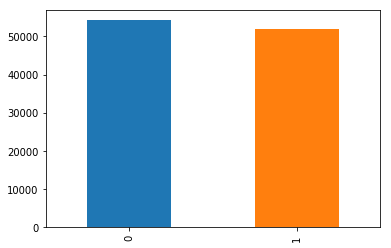

In [209]:
df[df.Firewall==0]['HasDetections'].value_counts().plot(kind='bar')

In [210]:
df[(df.AVProductsEnabled==0)&(df.Firewall==0)&(df.AVProductsInstalled==1)]['HasDetections'].value_counts()

1    323
0    292
Name: HasDetections, dtype: int64

In [211]:
df['AVProductsInstalled_dummy']=[1 if x==1 else 0 for x in df.AVProductsInstalled]

In [212]:
df.select_dtypes(include='category').columns

Index(['MachineIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName',
       'Census_ChassisTypeName', 'Census_PowerPlatformRoleName',
       'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel'],
      dtype='object')

In [213]:
temp1=df.OsBuildLab.str.split(".",expand=True)

In [214]:
#OsBuild
temp1[2].value_counts()

amd64fre    4542341
x86fre       457452
arm64fre        207
Name: 2, dtype: int64

In [215]:
df.Processor.value_counts()

x64      4542340
x86       457453
arm64        207
Name: Processor, dtype: int64

In [216]:
temp1.drop(columns=[2],inplace=True)

In [217]:
temp1.rename(columns={0:'OsBuildLab_0',1:'OsBuildLab_1',3:'OsBuildLab_3',4:'OsBuildLab_4'},inplace=True)

In [218]:
df=df.merge(temp1,left_index=True,right_index=True)

In [219]:
df[['OsBuildLab_0','OsBuild']].corr()

,OsBuild
OsBuild,1.0


In [220]:
df.drop(columns=['OsBuildLab_0'],inplace=True)

In [221]:
df.Census_MDC2FormFactor.value_counts()

Notebook        3206891
Desktop         1093156
Convertible      227420
Detachable       167373
AllInOne         164117
PCOther           78624
LargeTablet       37611
SmallTablet       17579
SmallServer        4813
MediumServer       1928
LargeServer         472
ServerOther          15
IoTOther              1
Name: Census_MDC2FormFactor, dtype: int64

In [222]:
df.select_dtypes(include='object').columns

Index(['OsBuildLab_1', 'OsBuildLab_3', 'OsBuildLab_4'], dtype='object')

In [223]:
%%time
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].astype('category')

Wall time: 2.22 s


In [224]:
df['OsBuildLab_1']=df['OsBuildLab_1'].astype('int32')

In [225]:
categorical_cols=df.select_dtypes(include='category').columns

In [226]:
categorical_cols=categorical_cols[1:]

In [227]:
#temp_dict={}
#number_of_unique={}
#equal_col=[]
#for col in df.columns:
#    if col=='MachineIdentifier':
#        continue
#    elif col in categorical_cols:
#        temp_dict[col]=statistics.mode(df[col])
#        number_of_unique[col]=df[col].nunique()
#    else:
#        temp_dict[col]=np.nanmedian(df[col])

In [229]:
%%time
le={}
for col in categorical_cols:
    le[col]=LabelEncoder()
    df[col]=le[col].fit_transform(df[col])

Wall time: 13.8 s


In [230]:
df.shape

(5000000, 371)

In [231]:
df.select_dtypes(include='int32').columns

Index(['LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite',
       'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier', 'AppVersion_1',
       'AppVersion_2', 'AppVersion_3', 'EngineVersion_2', 'EngineVersion_3',
       'AvSigVersion_1', 'AvSigVersion_2', 'OsVer_0', 'OsVer_1', 'OsVer_2',
       'OsVer_3', 'OsBuildLab_1'],
      dtype='object')

In [232]:
corr1=df[df.select_dtypes(include='int32').columns].corr()

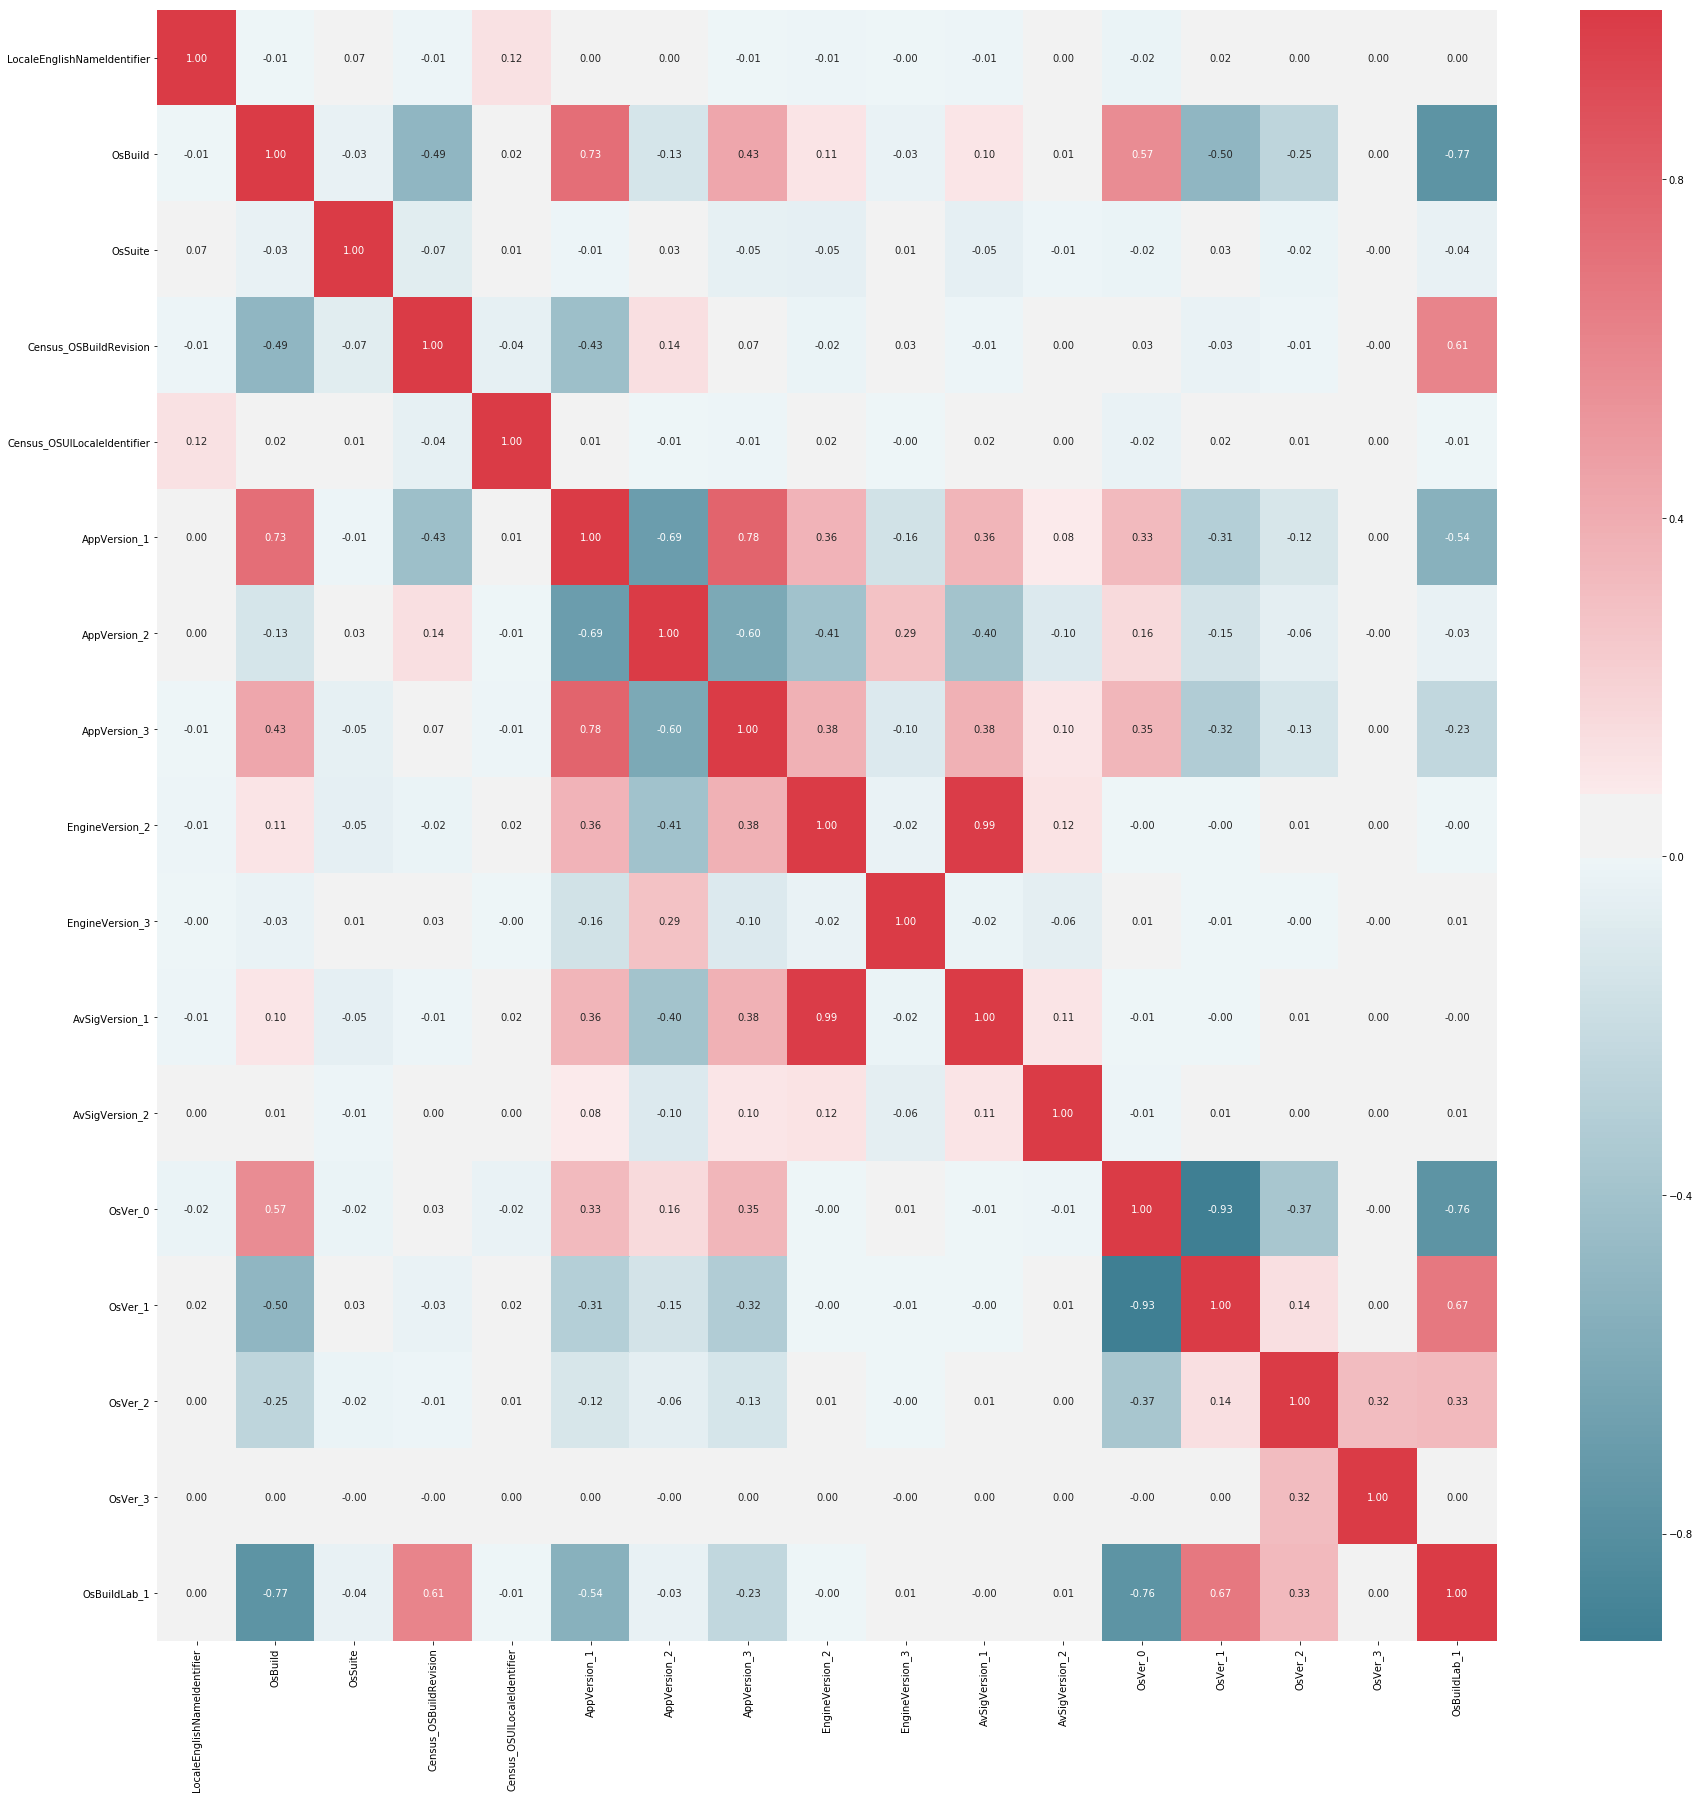

In [233]:
fig, ax = plt.subplots(figsize=(30,30))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1, cmap=colormap, annot=True, fmt=".2f")#

In [241]:
df.drop(columns=['AvSigVersion_1','AppVersion_1','OsBuildLab_1','OsVer_1'],inplace=True)

In [245]:
corr2=df.select_dtypes(include='int64').corr()

In [247]:
def myplot(corr1):
    fig, ax = plt.subplots(figsize=(30,30))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr1, cmap=colormap, annot=True, fmt=".2f")

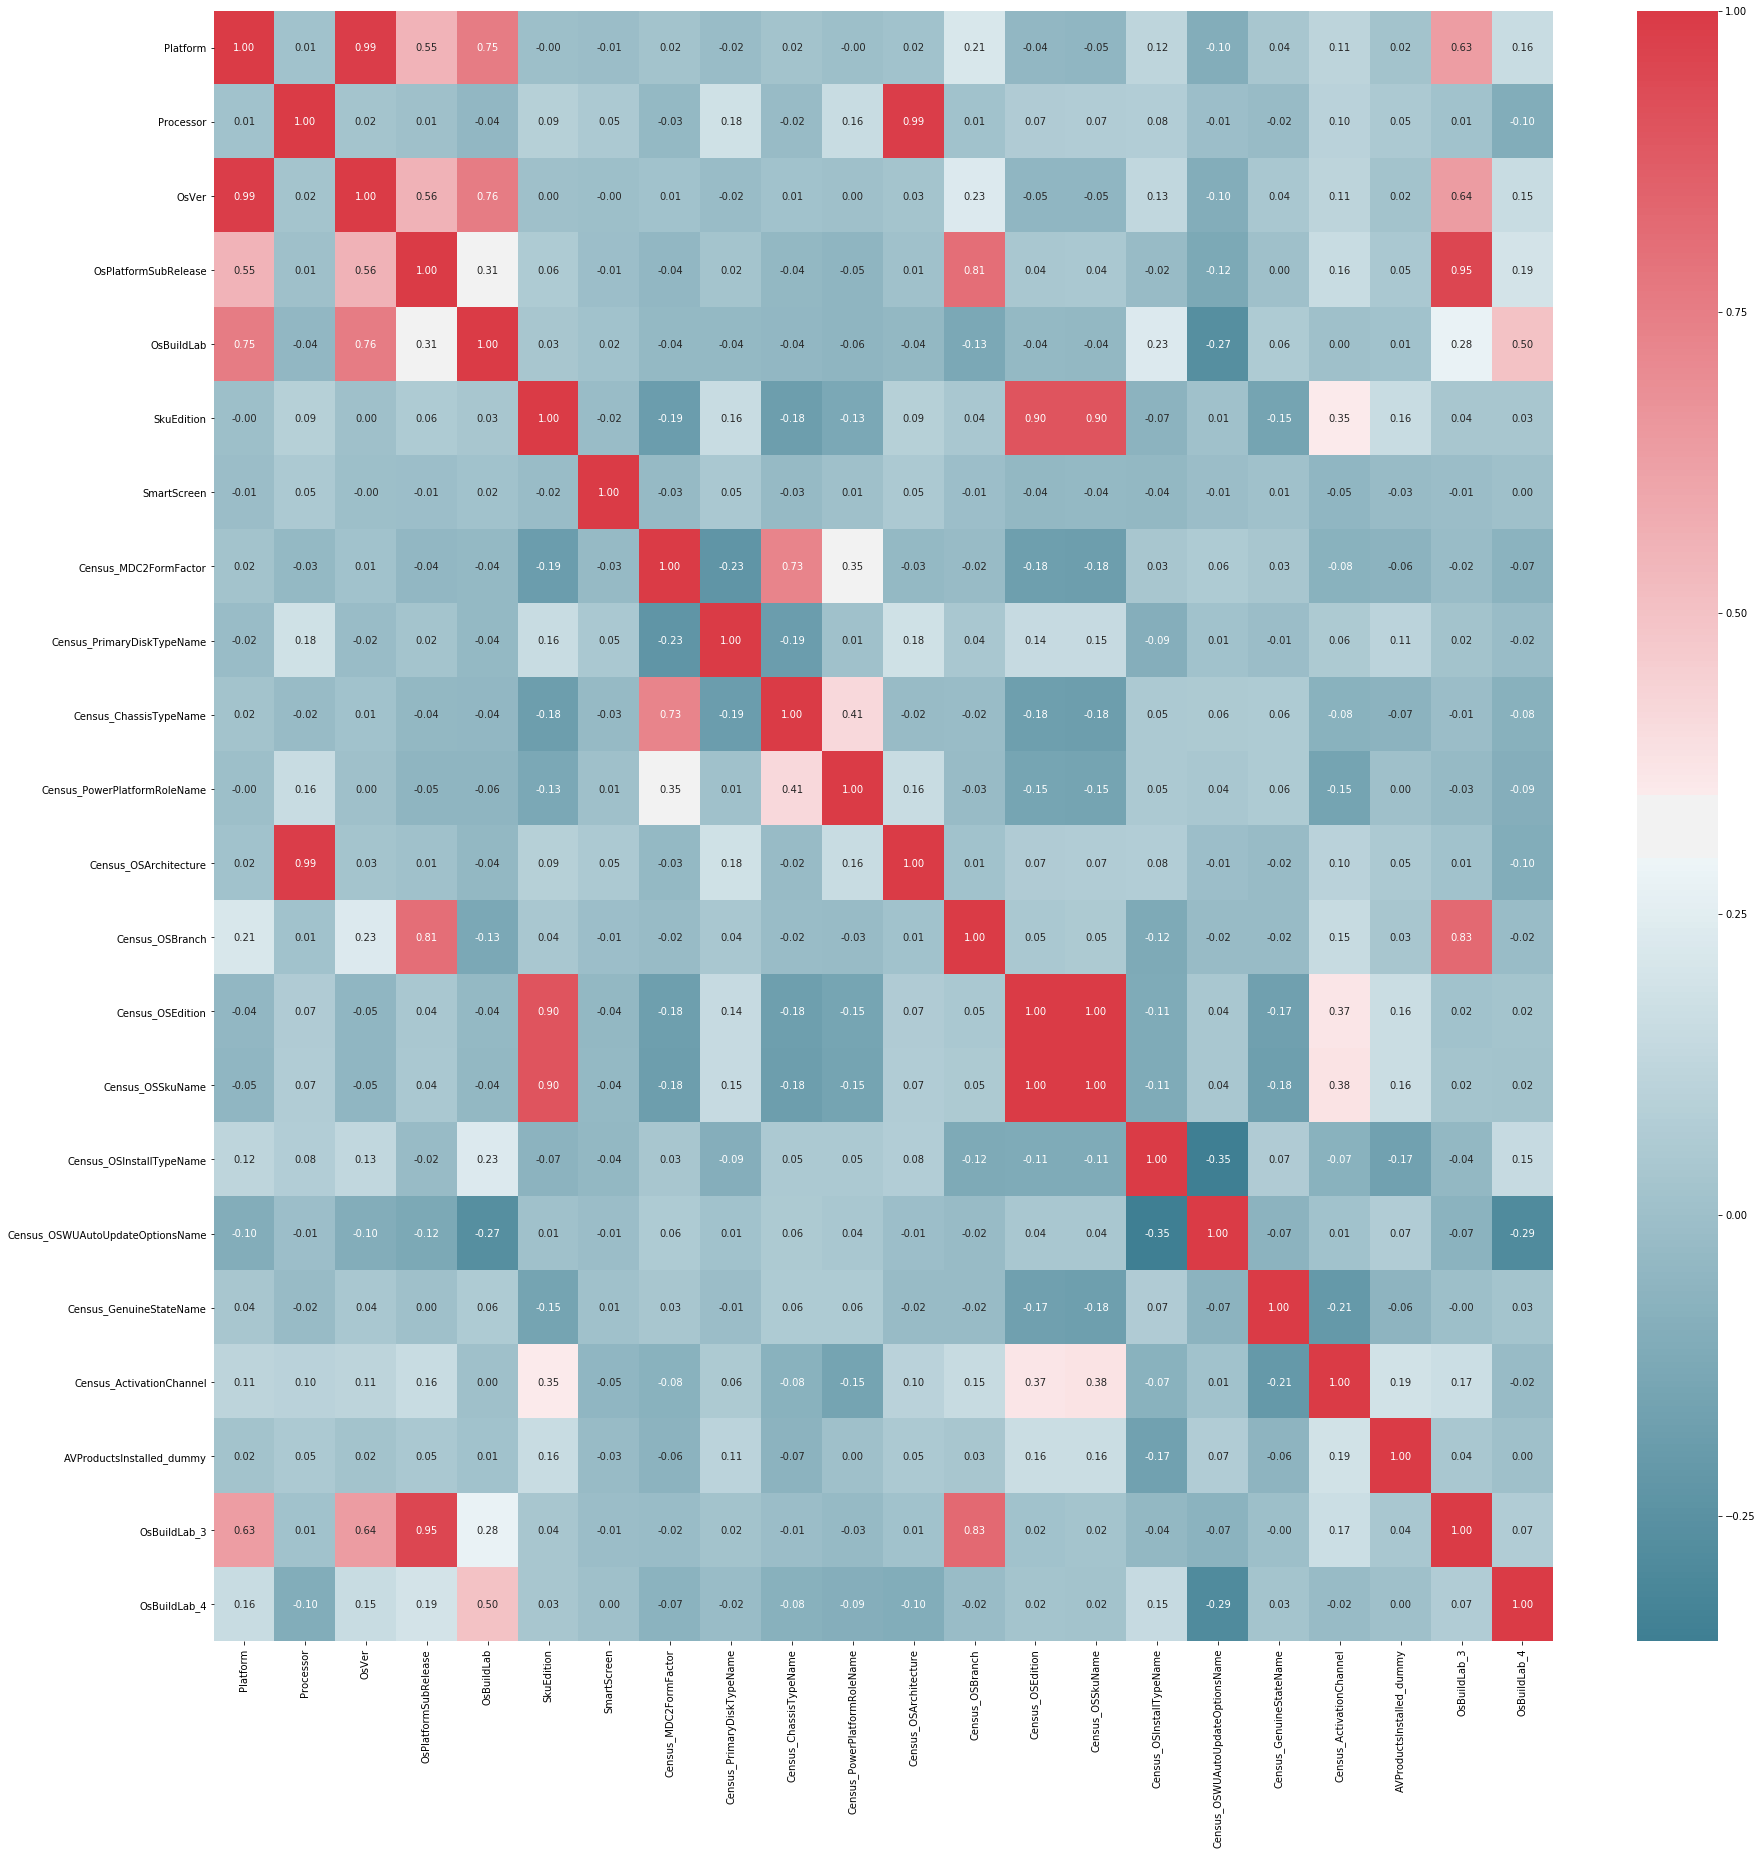

In [248]:
myplot(corr2)#['Platform','Processor','OsVer','Census_OSBranch','OsBuildLab_3','SkuEdition','Census_MDC2FormFactor','Census_OSEdition','OsBuildLab']

In [249]:
df.shape

(5000000, 367)

In [250]:
df.drop(columns=['Platform','Processor','OsVer','Census_OSBranch','OsBuildLab_3','SkuEdition','Census_MDC2FormFactor','Census_OSEdition','OsBuildLab'],inplace=True)

In [251]:
df.shape

(5000000, 358)

In [264]:
len(df.select_dtypes(include='int8').columns)

315

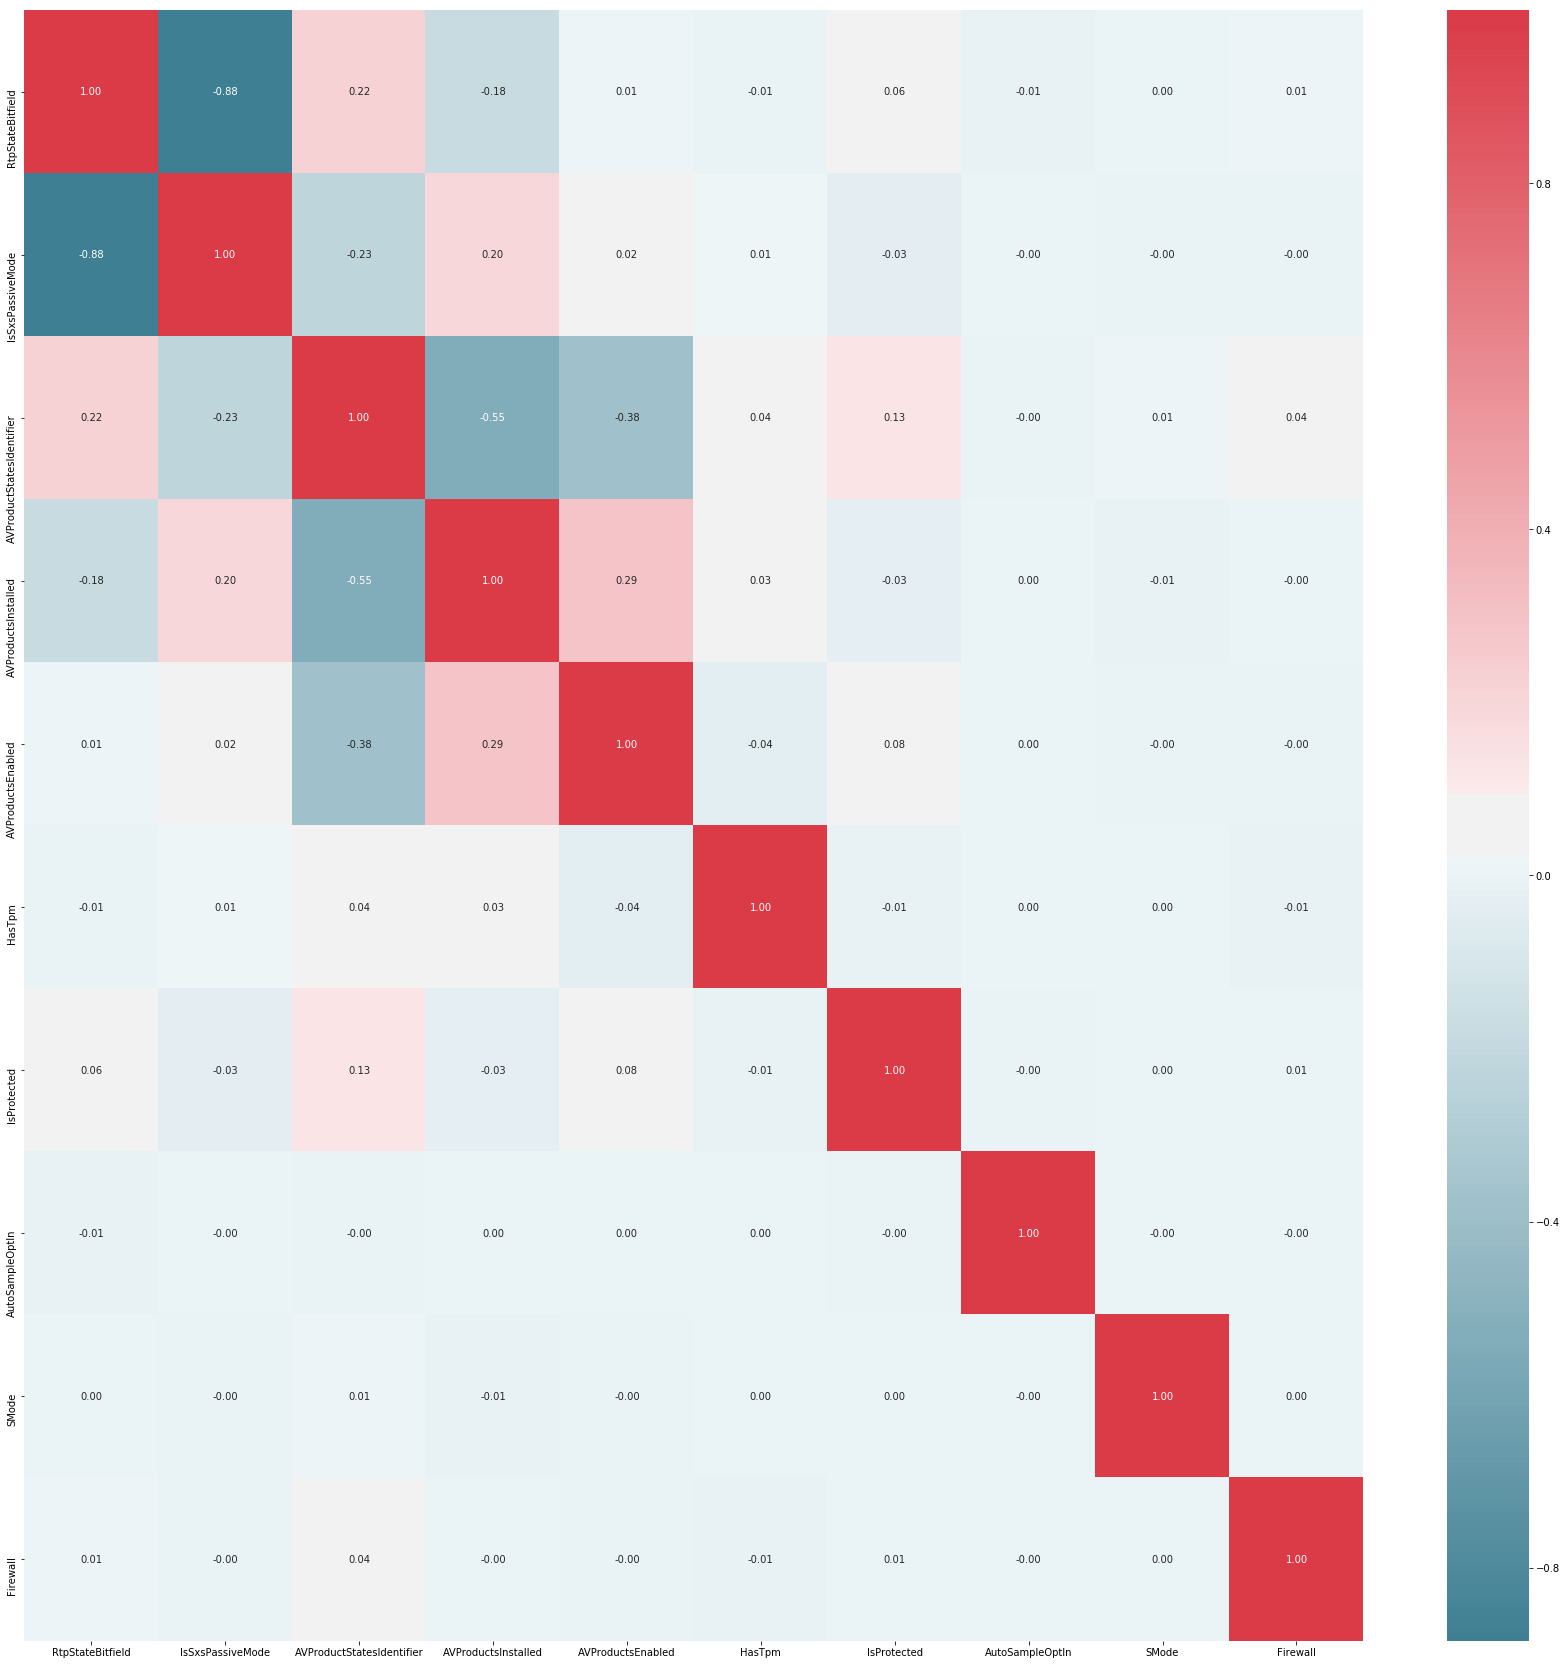

In [263]:
corr1=df[['RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'IsProtected',
       'AutoSampleOptIn', 'SMode', 'Firewall']].corr()
myplot(corr1)

In [265]:
df.drop(columns=['IsSxsPassiveMode'],inplace=True)

In [270]:
filter_col1 = [col for col in df if col.startswith('CountryIdentifier')]

In [272]:
filter_col2=[col for col in df if col.startswith('OrganizationIdentifier')]

In [273]:
filter_col3=[col for col in df if col.startswith('GeoNameIdentifier')]

In [276]:
filter_col4=[col for col in df if col.startswith('Wdft_RegionIdentifier')]

In [283]:
x=[]
for col in df.select_dtypes(include='int8').columns:
    if col in list(filter_col4+filter_col1+filter_col2+filter_col3):
        pass
    else:
        x.append(col)

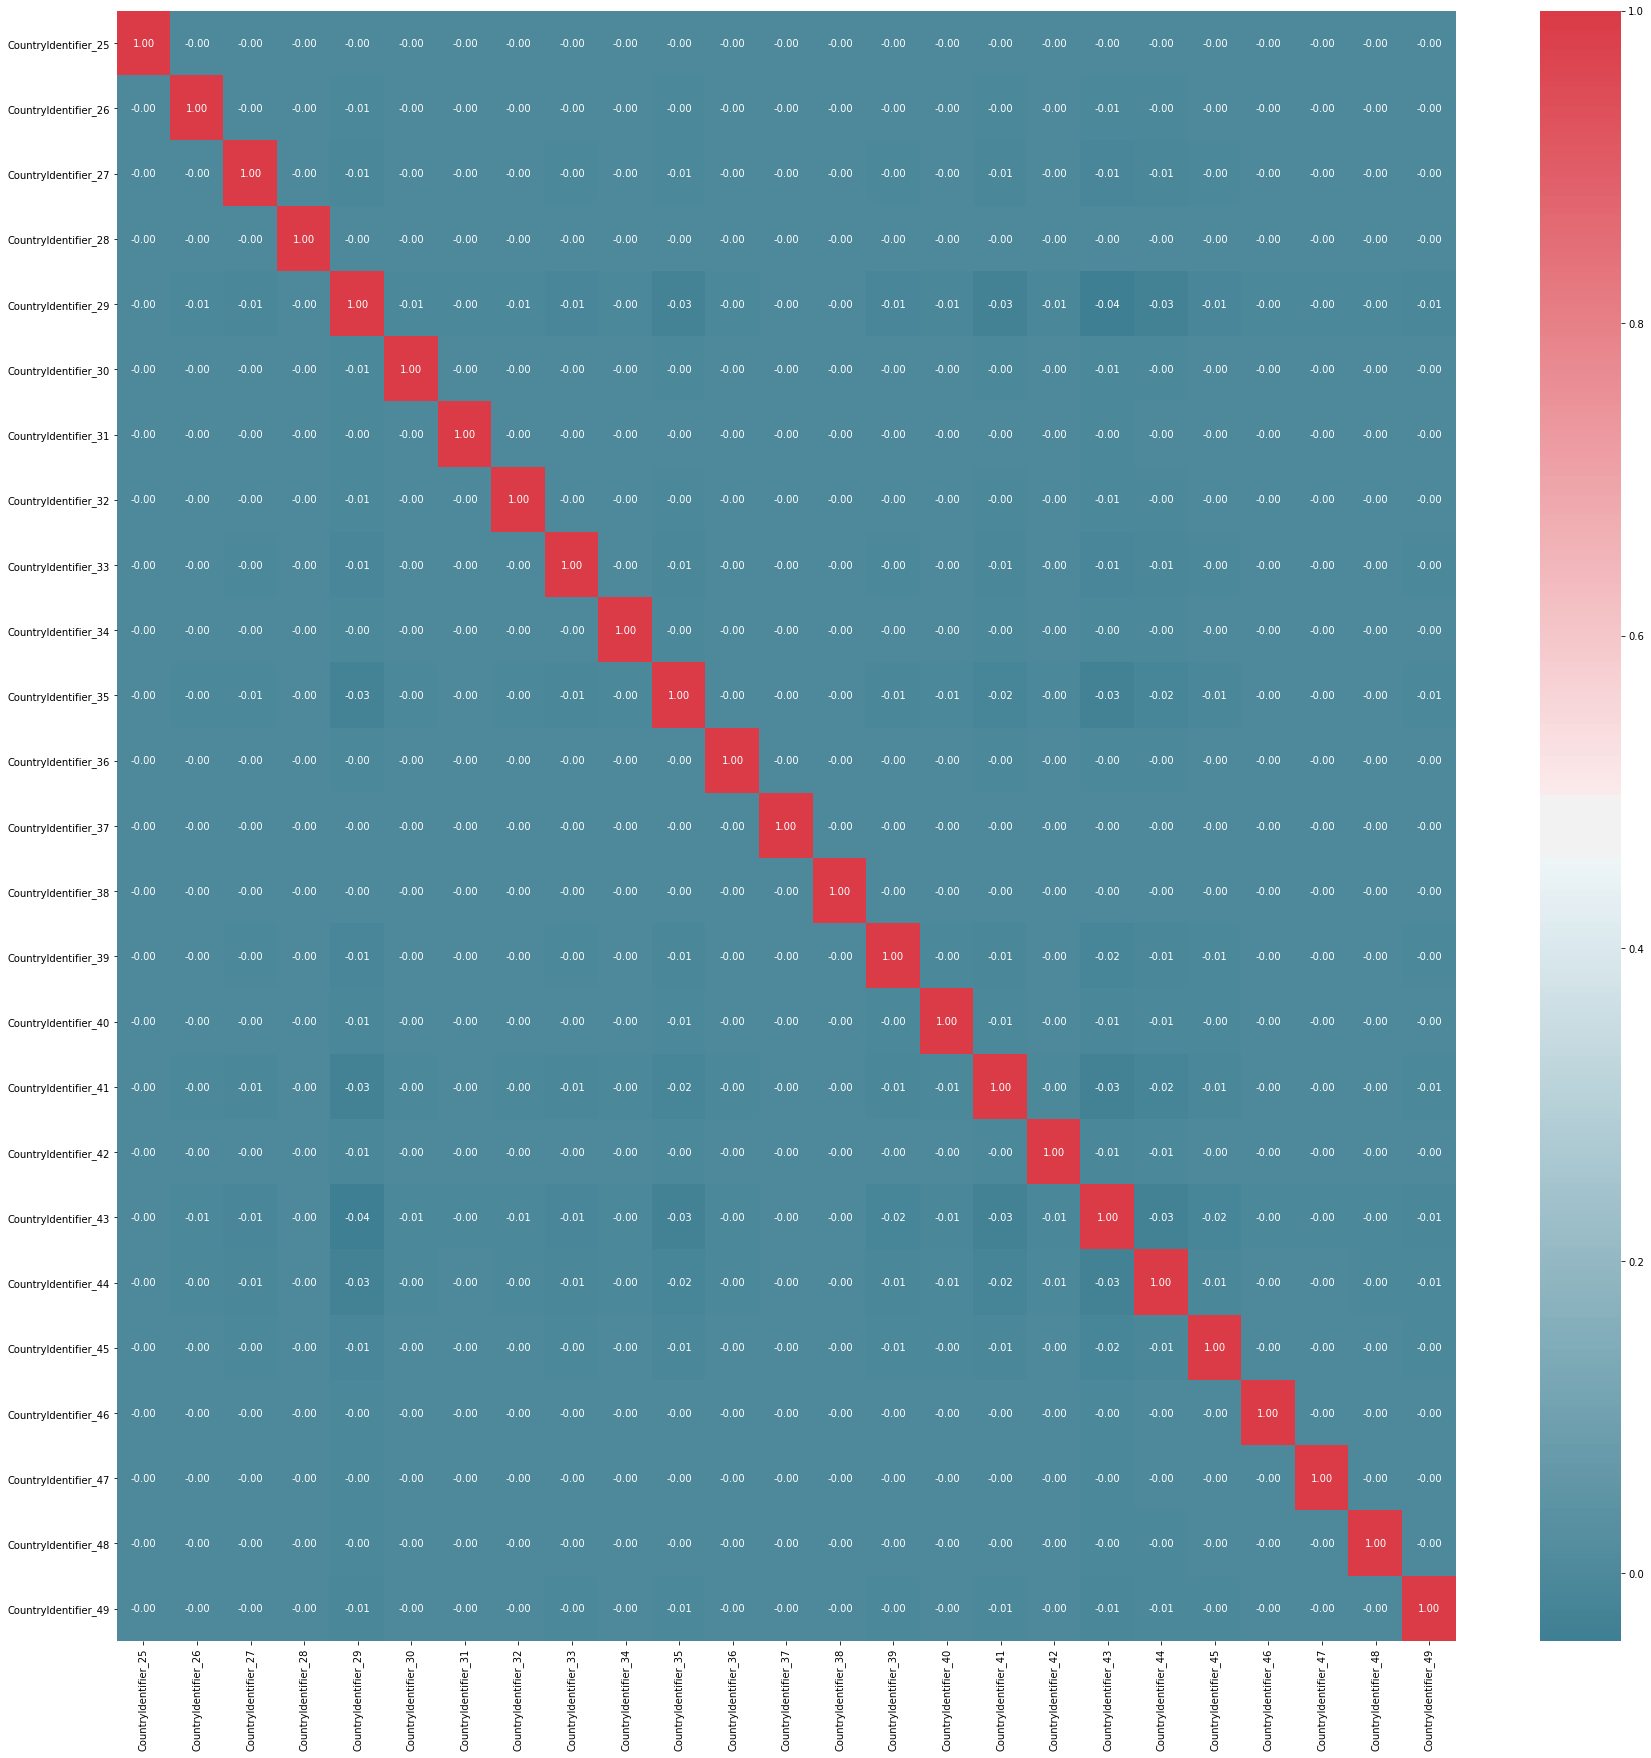

In [269]:
corr1=df[df.select_dtypes(include='int8').columns[45:70]].corr()
myplot(corr1)

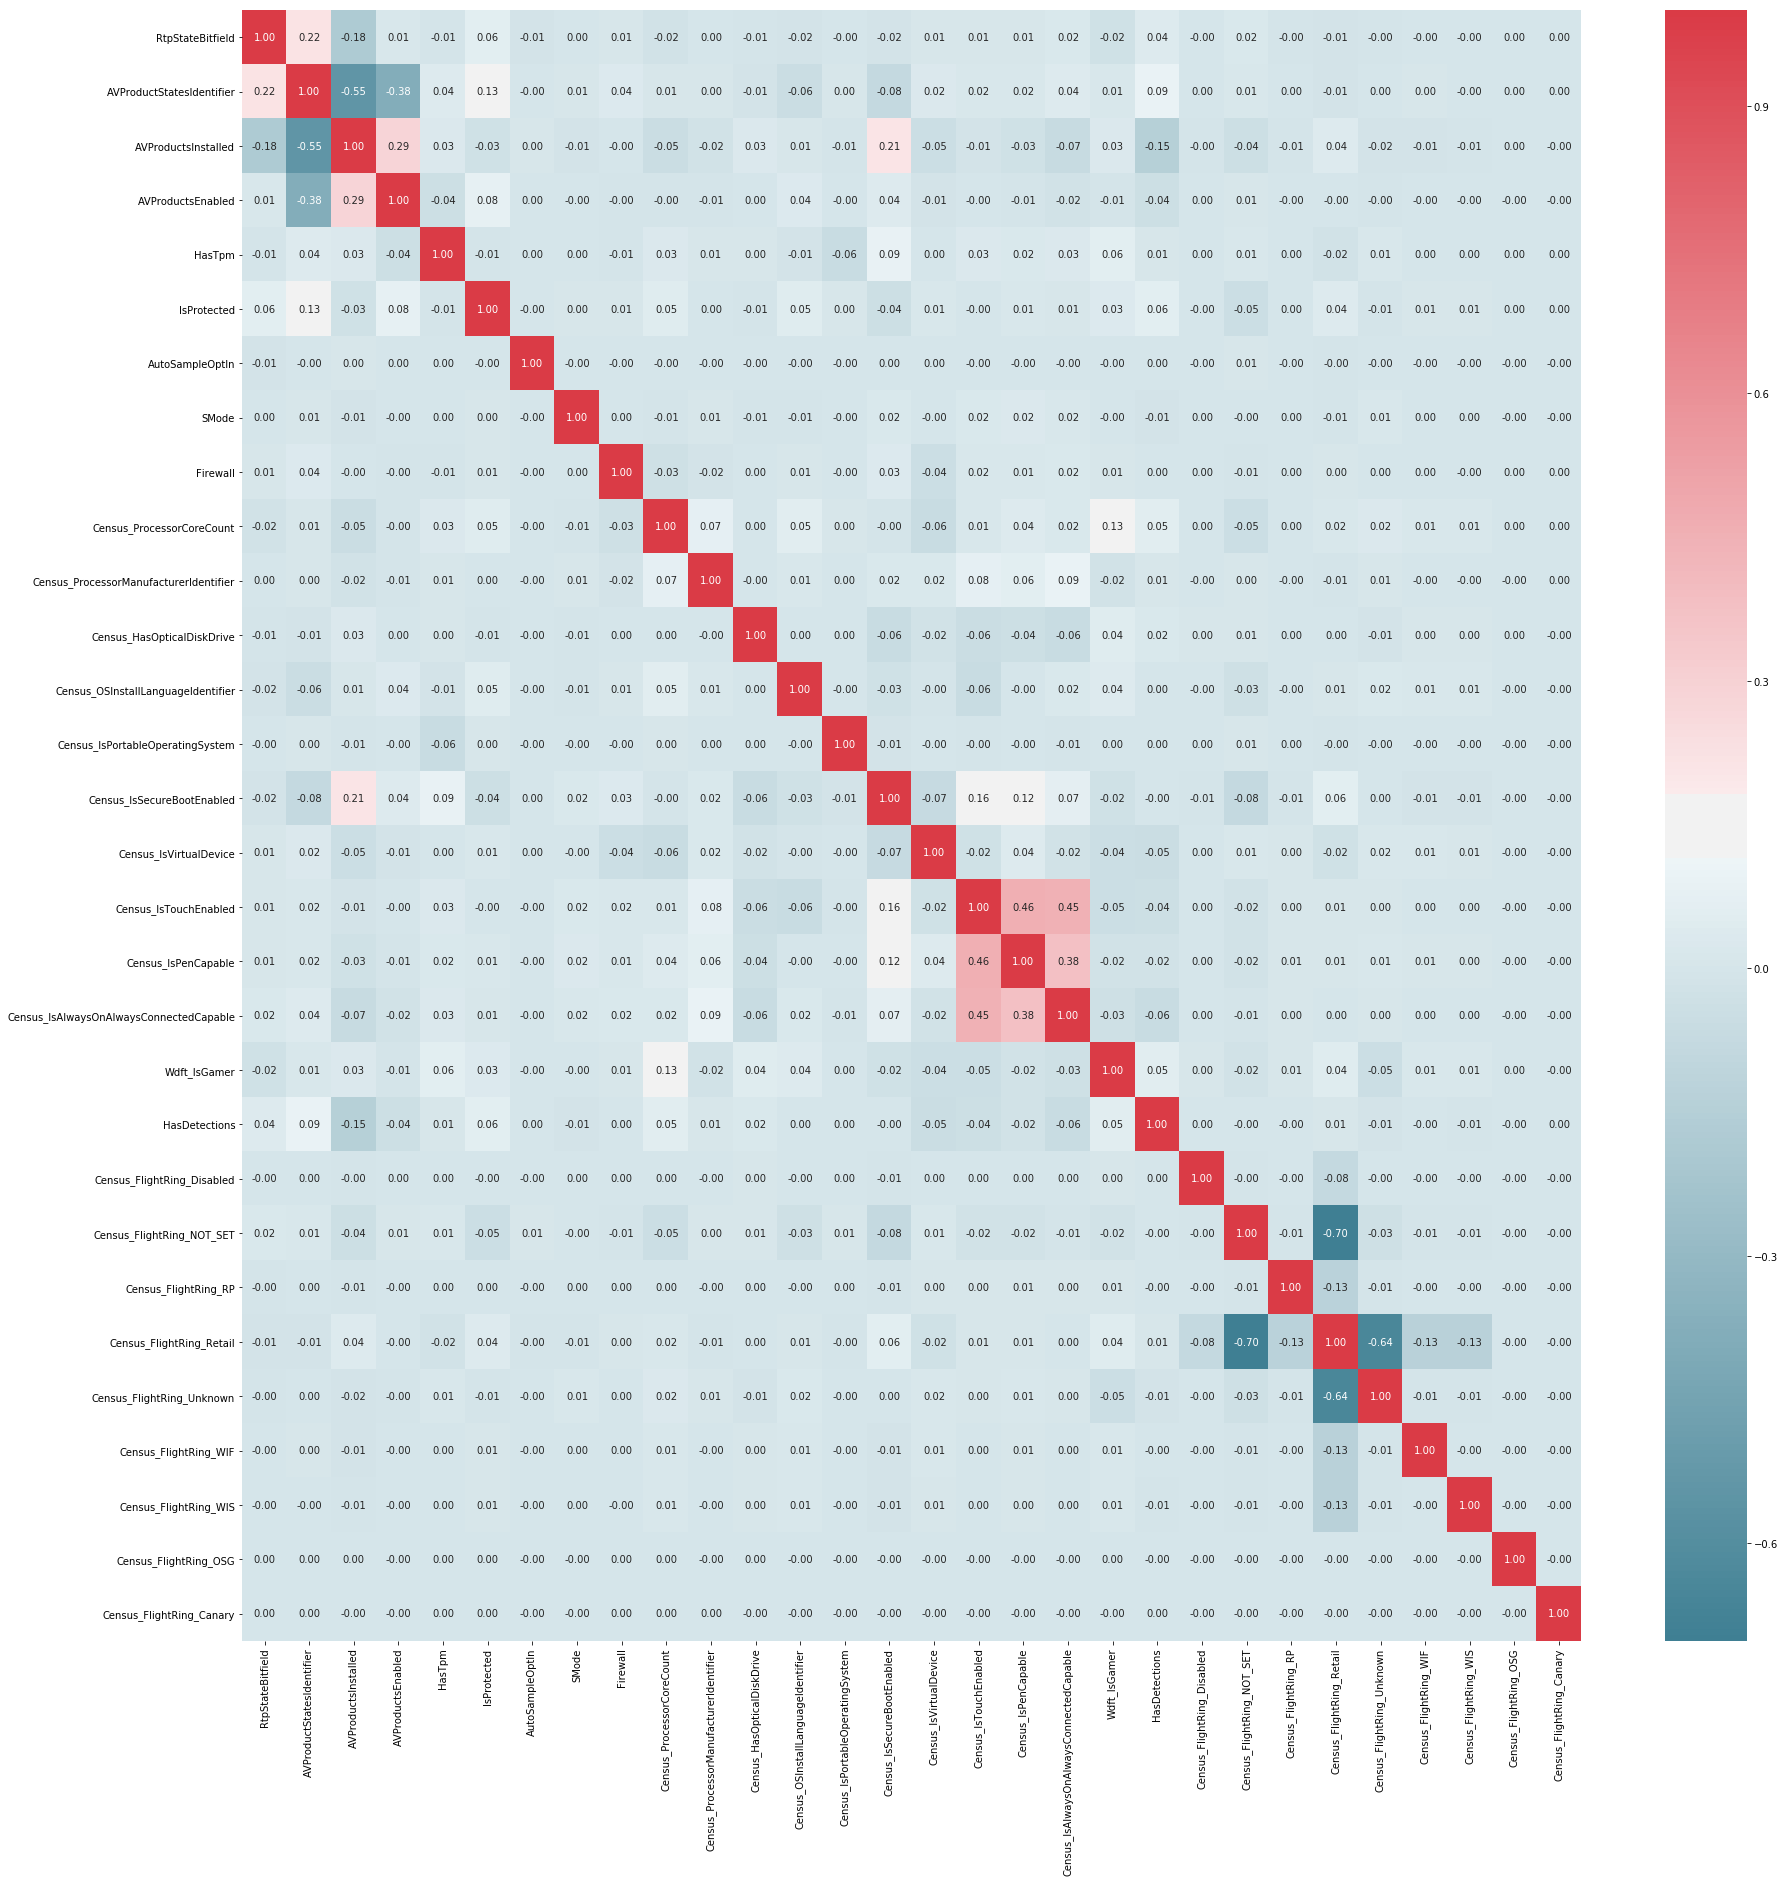

In [287]:
corr1=df[x].corr()
myplot(corr1)

In [288]:
df.shape

(5000000, 357)

In [289]:
df.drop(columns=['Census_FlightRing_NOT_SET','Census_FlightRing_Unknown'],inplace=True)

In [290]:
df.shape

(5000000, 355)

In [292]:
df.select_dtypes(include='float32').columns

Index(['CityIdentifier', 'UacLuaenable', 'Census_OEMModelIdentifier',
       'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_InternalBatteryNumberOfCharges',
       'Census_FirmwareVersionIdentifier'],
      dtype='object')

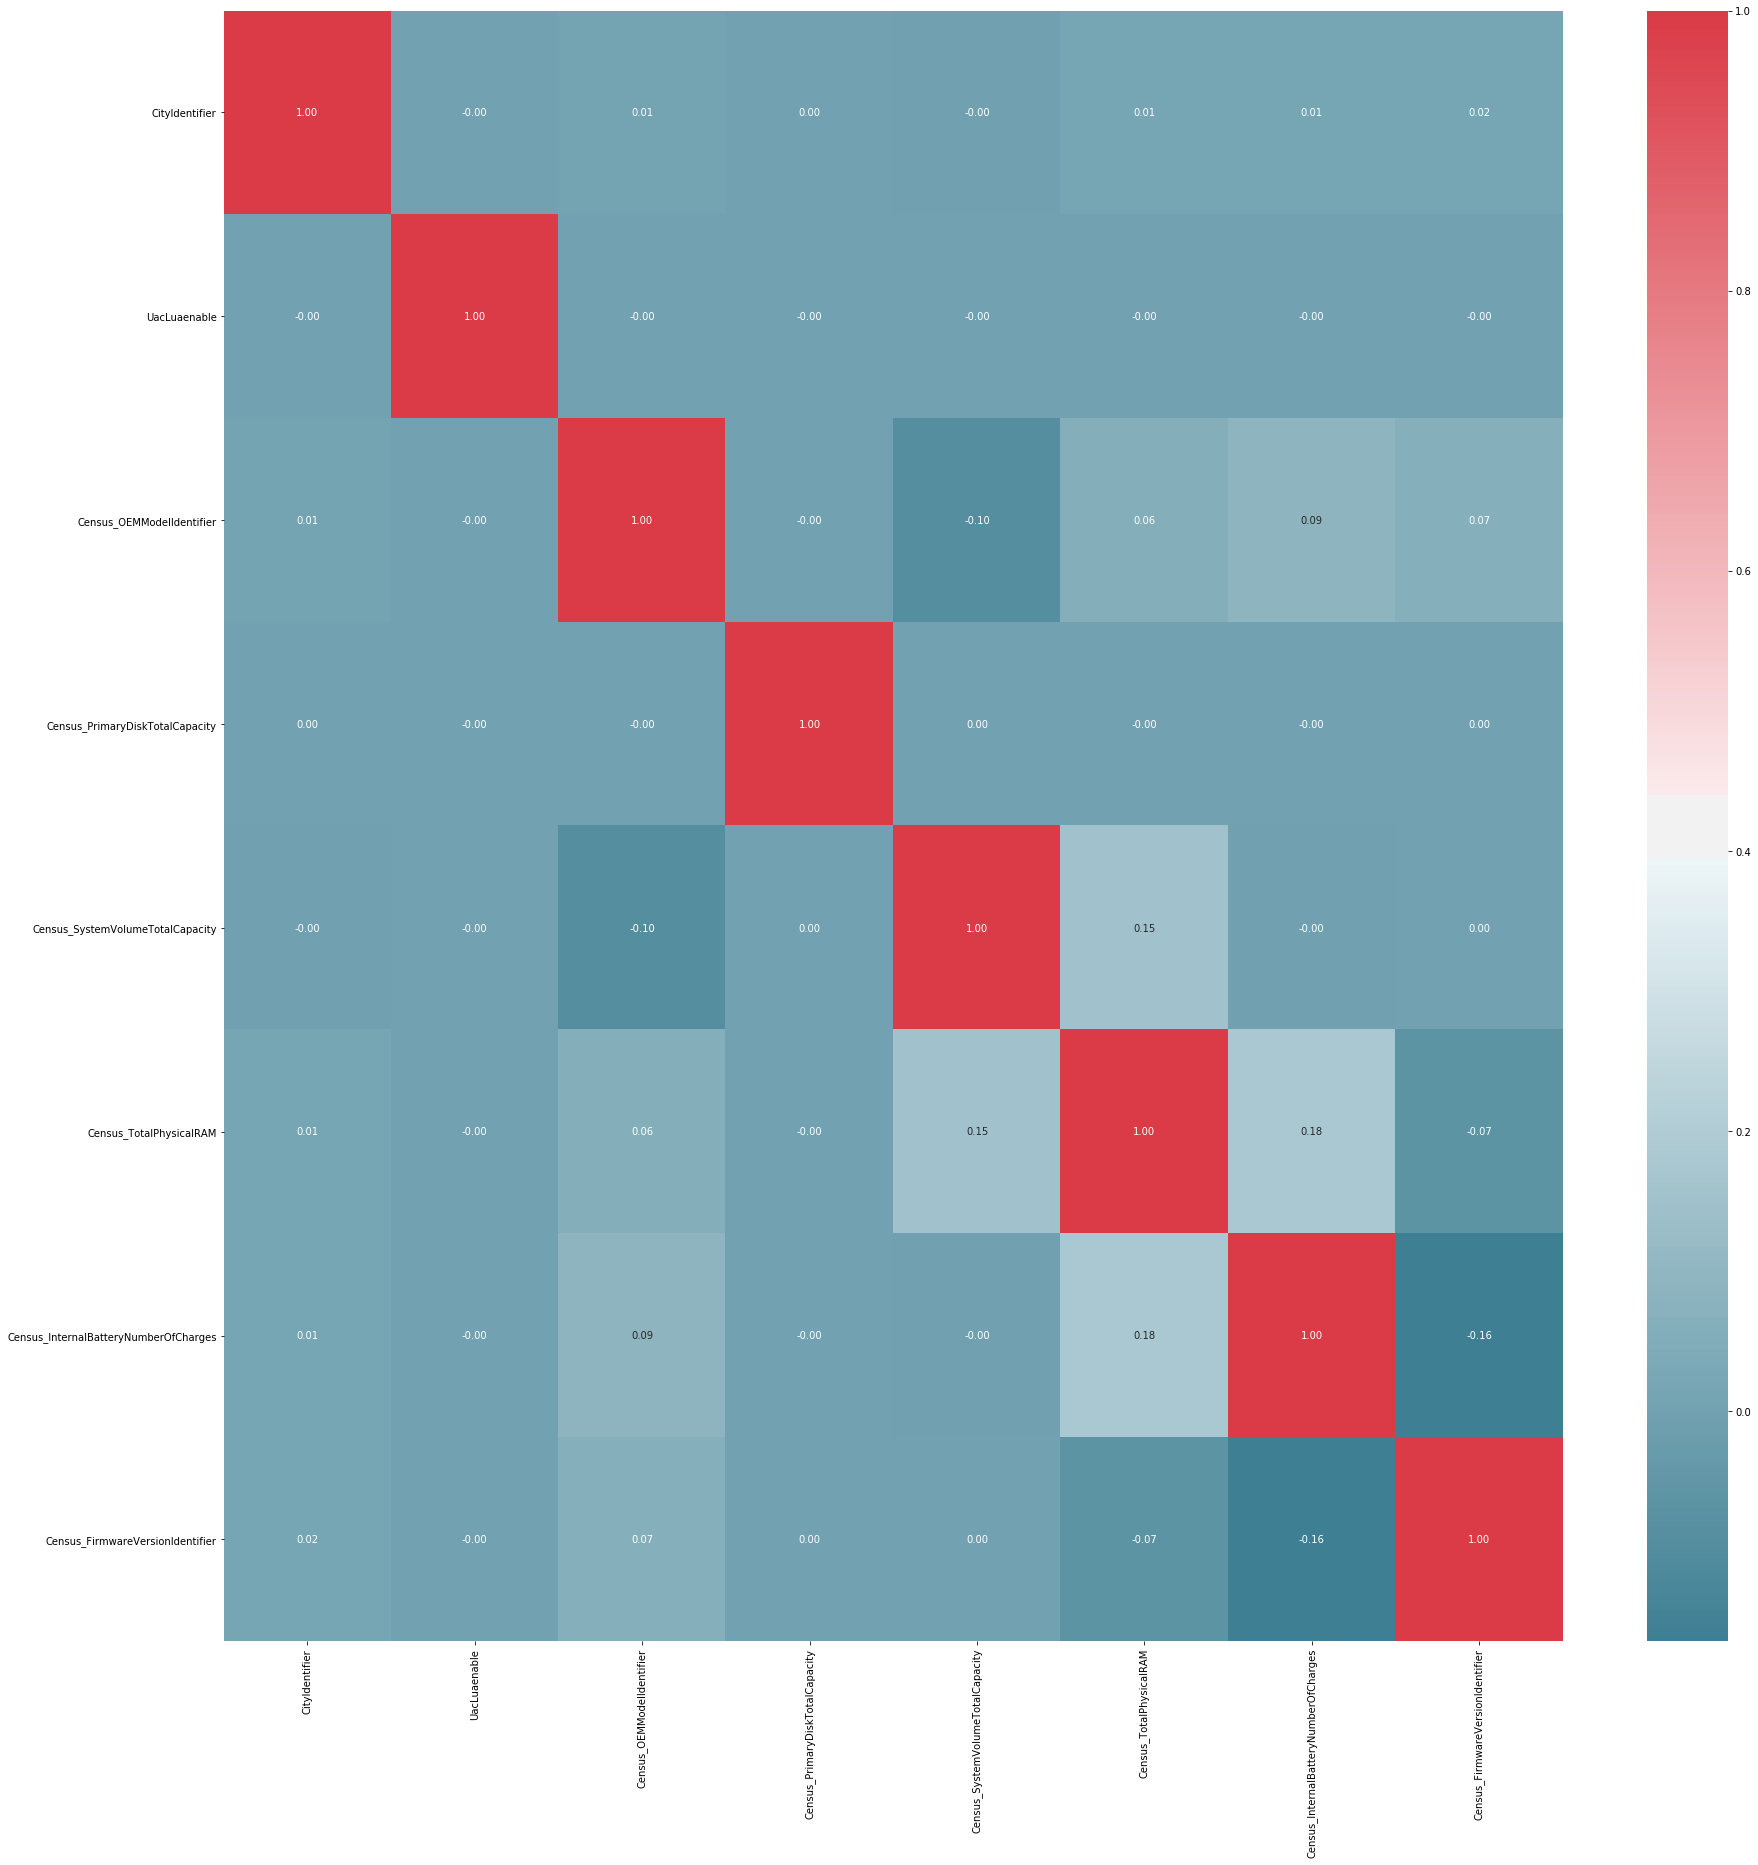

In [294]:
corr1=df[['CityIdentifier', 'UacLuaenable', 'Census_OEMModelIdentifier',
       'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_InternalBatteryNumberOfCharges',
       'Census_FirmwareVersionIdentifier']].corr()
myplot(corr1)

In [295]:
df.select_dtypes(include='float16').columns

Index(['GeoNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier',
       'Census_ProcessorModelIdentifier',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_FirmwareManufacturerIdentifier'],
      dtype='object')

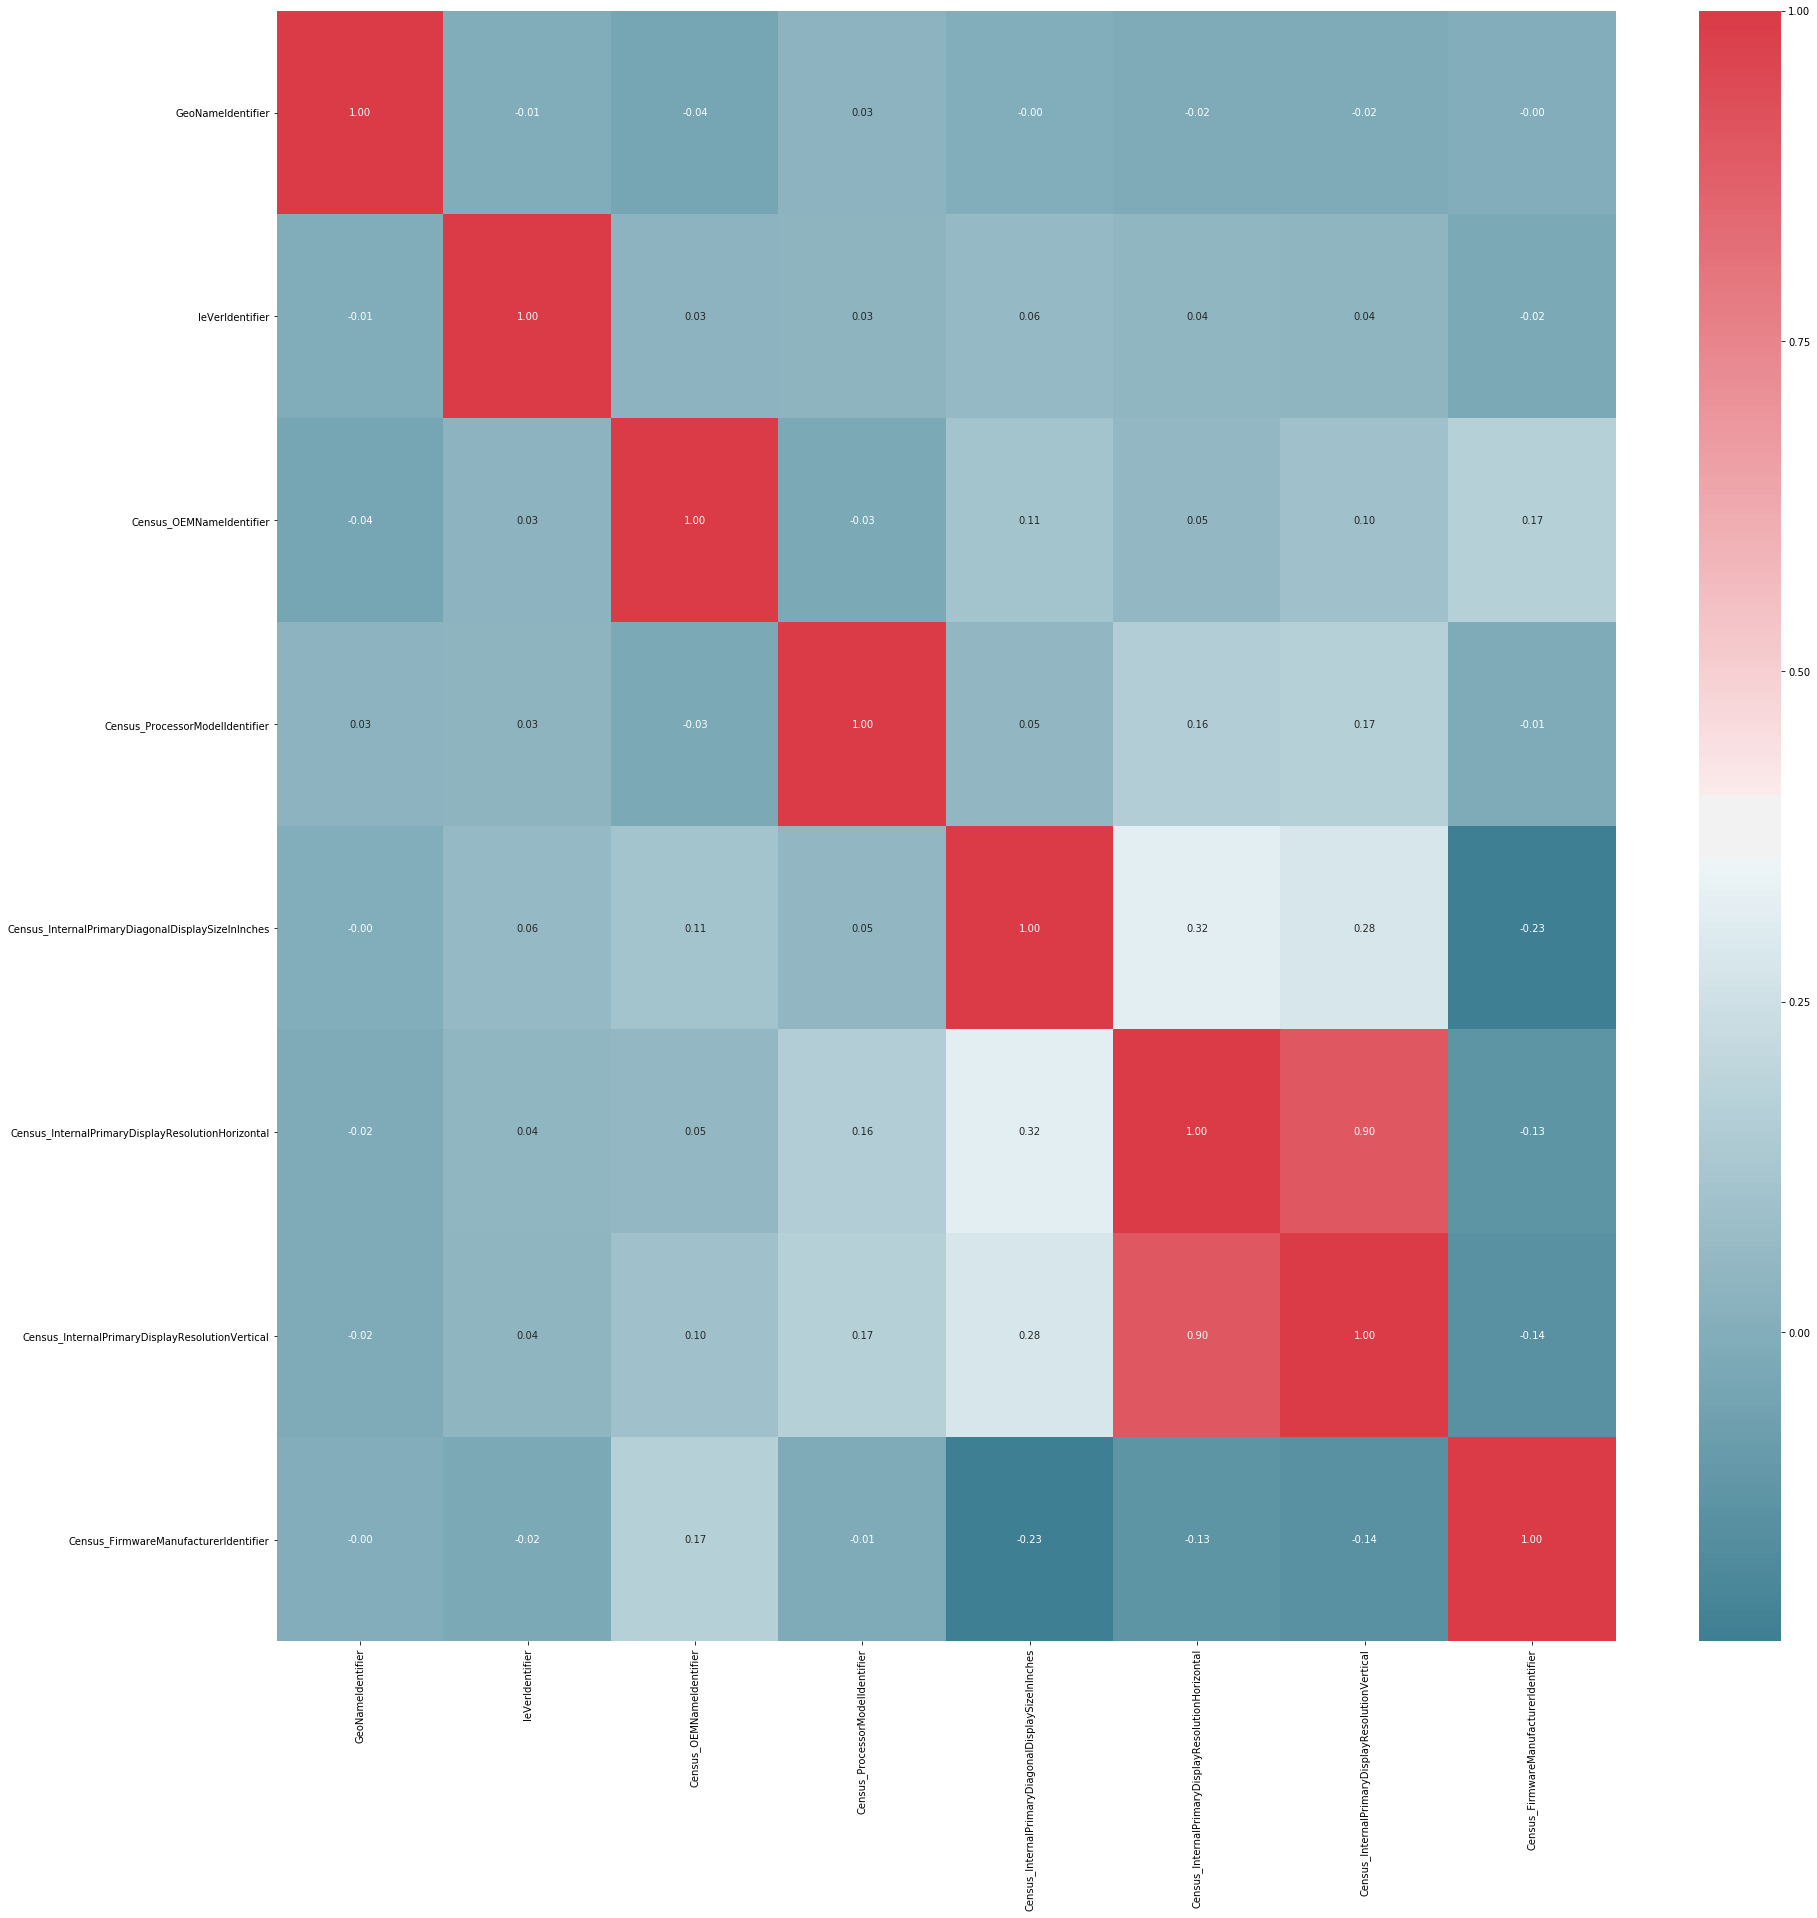

In [296]:
corr1=df[['GeoNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier',
       'Census_ProcessorModelIdentifier',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_FirmwareManufacturerIdentifier']].corr()
myplot(corr1)

In [297]:
df.drop(columns=['Census_InternalPrimaryDisplayResolutionHorizontal'],inplace=True)

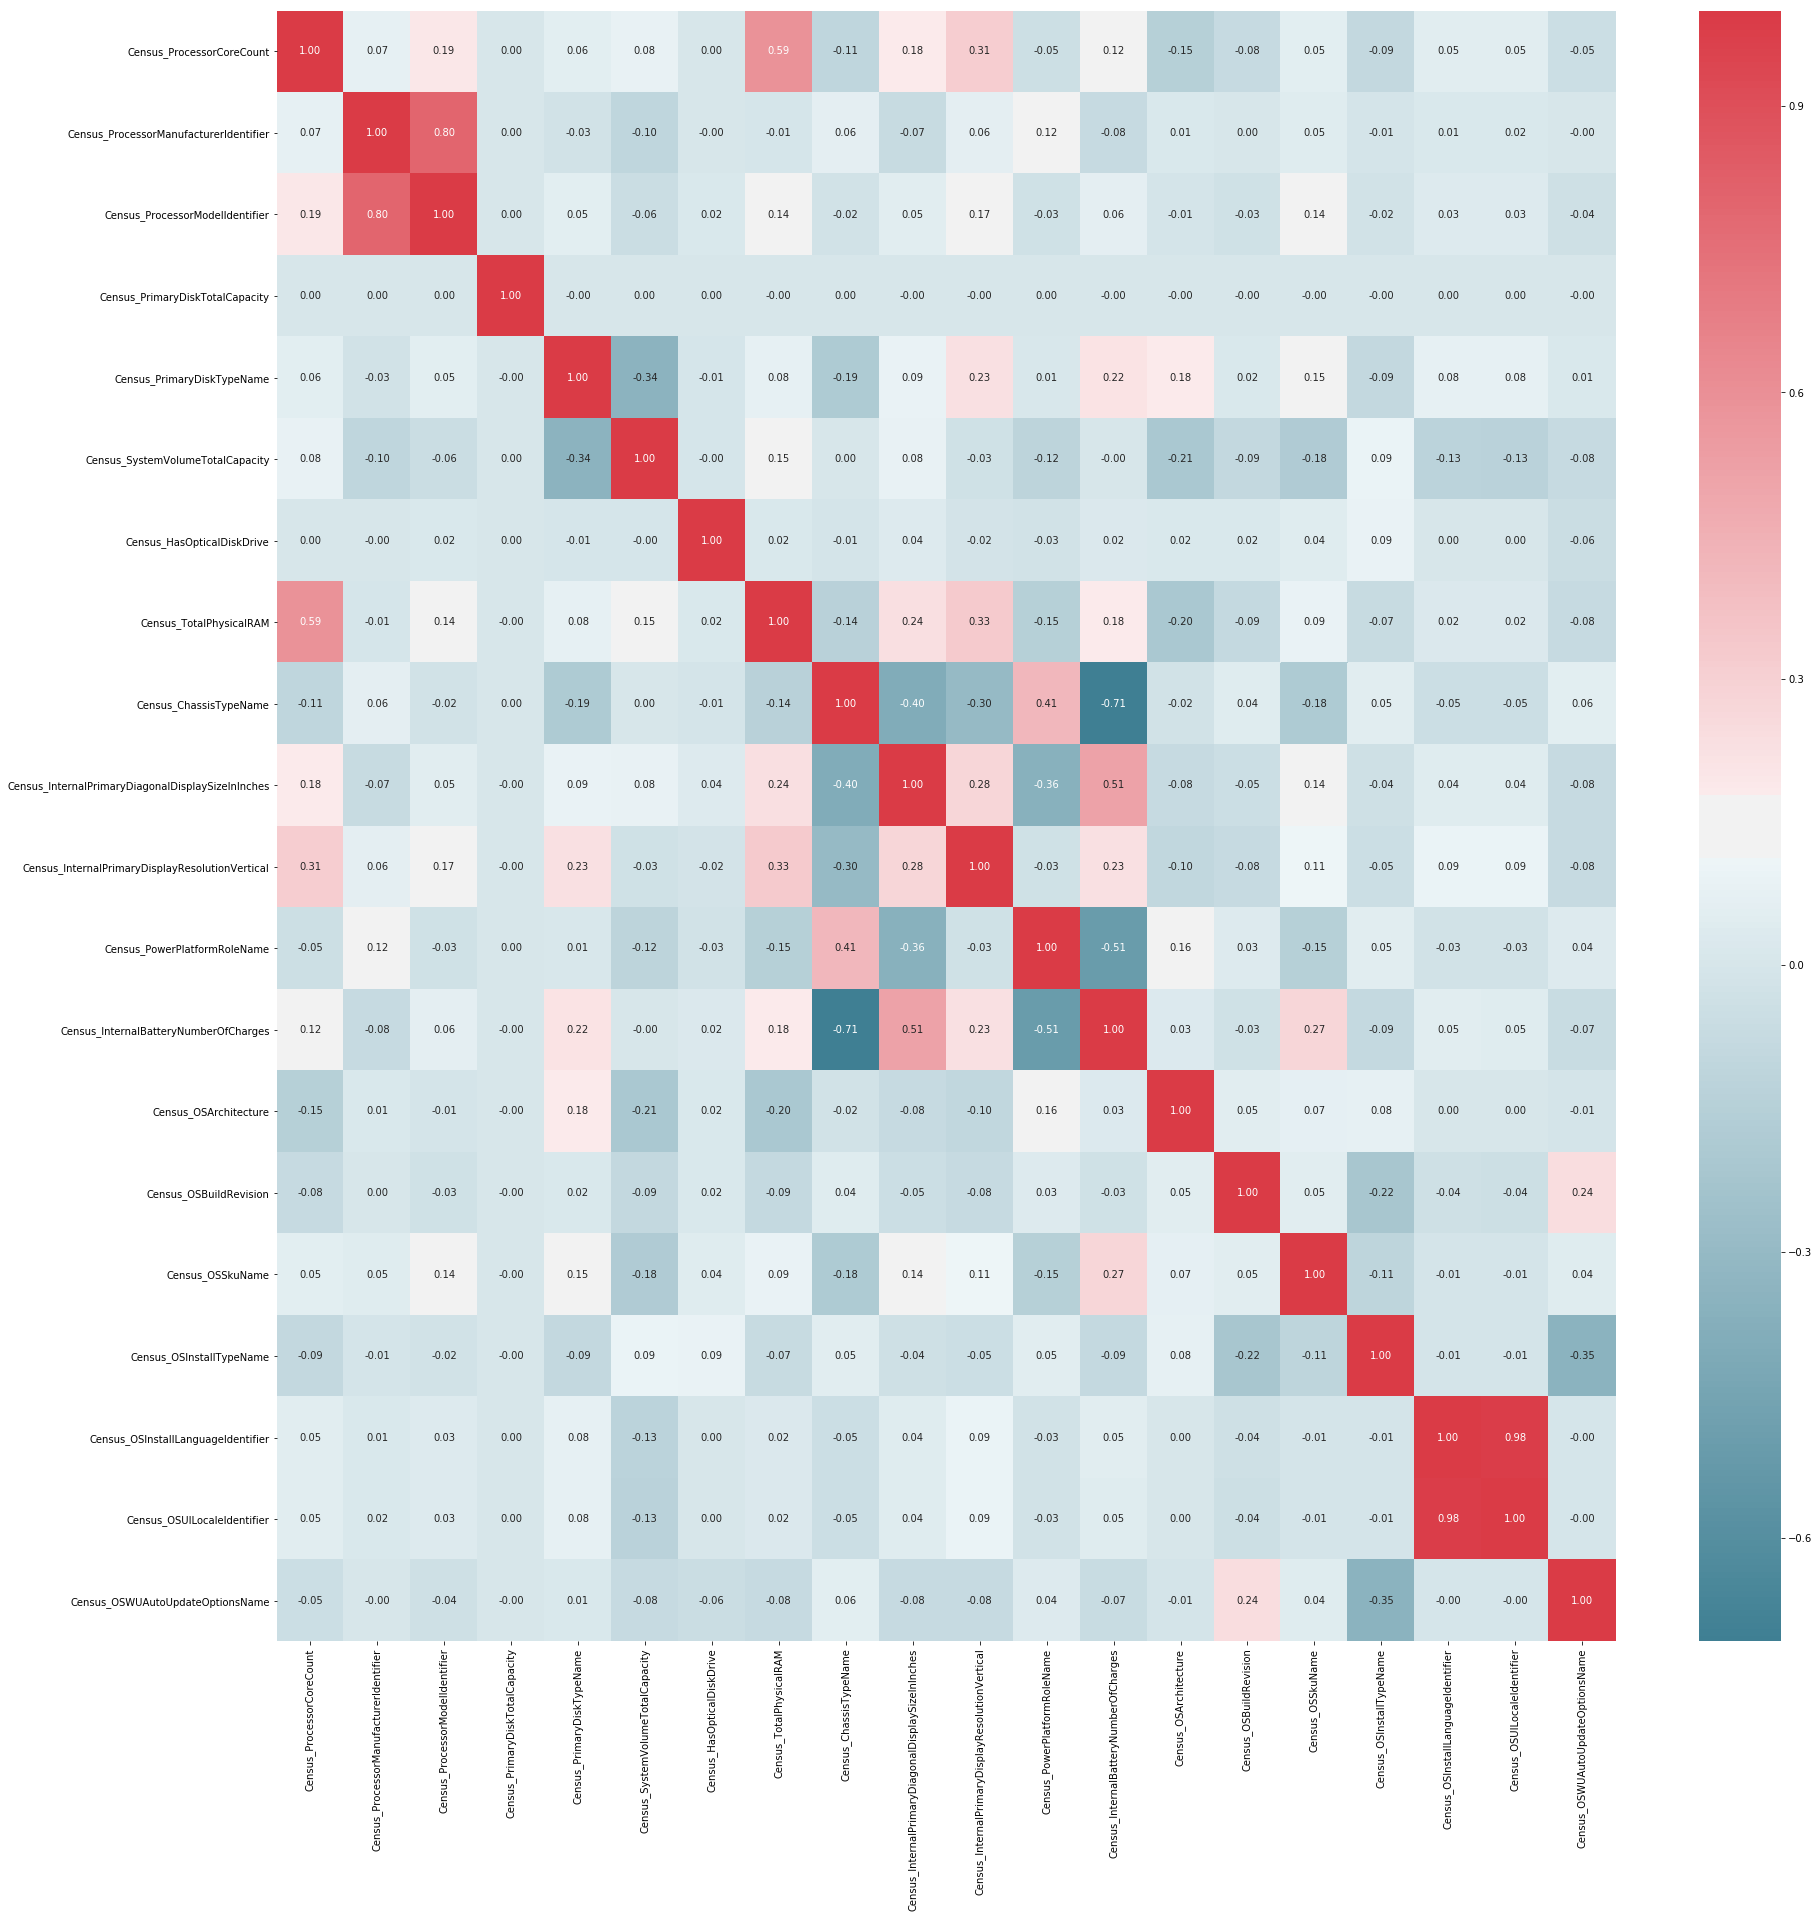

In [303]:
myplot(df[df.select_dtypes(exclude=['object','category']).columns[20:40]].corr())

In [305]:
df.drop(columns=['Census_TotalPhysicalRAM','Census_ProcessorManufacturerIdentifier','Census_InternalBatteryNumberOfCharges'],inplace=True)

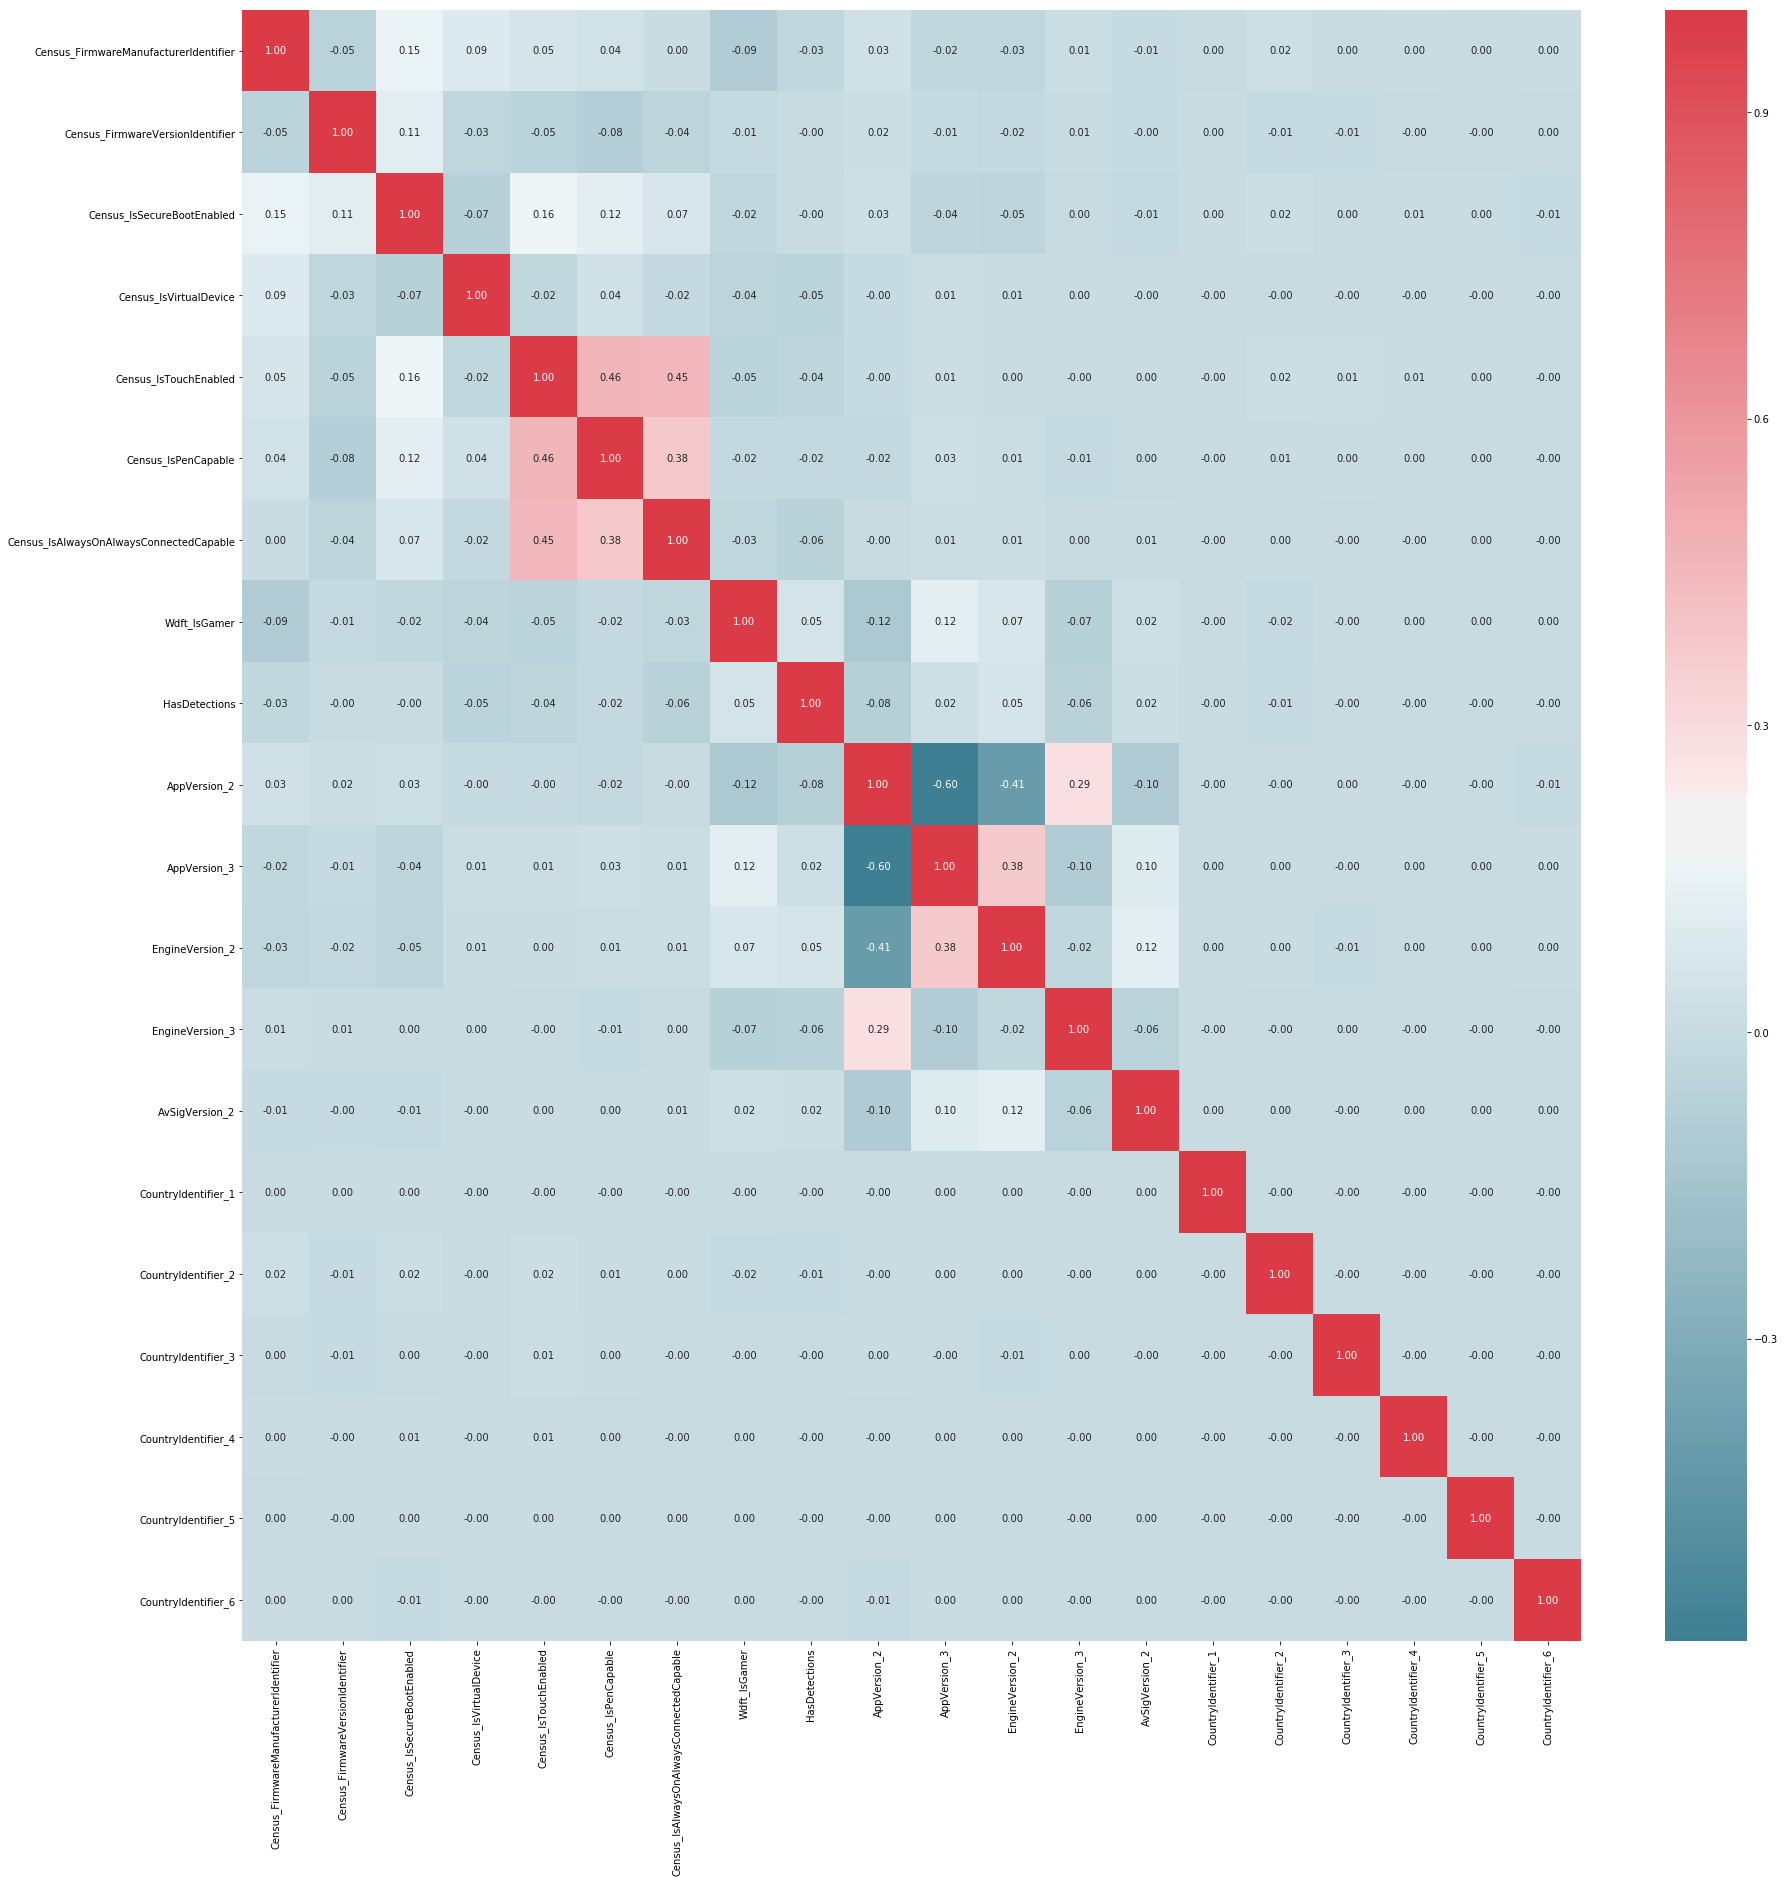

In [309]:
myplot(df[df.select_dtypes(exclude=['object','category']).columns[40:60]].corr())

In [310]:
df.drop(columns=['AppVersion_2'],inplace=True)

In [311]:
x=[]
for col in df.select_dtypes(exclude=['object','category']).columns:
    if col in list(filter_col4+filter_col1+filter_col2+filter_col3):
        pass
    else:
        x.append(col) 

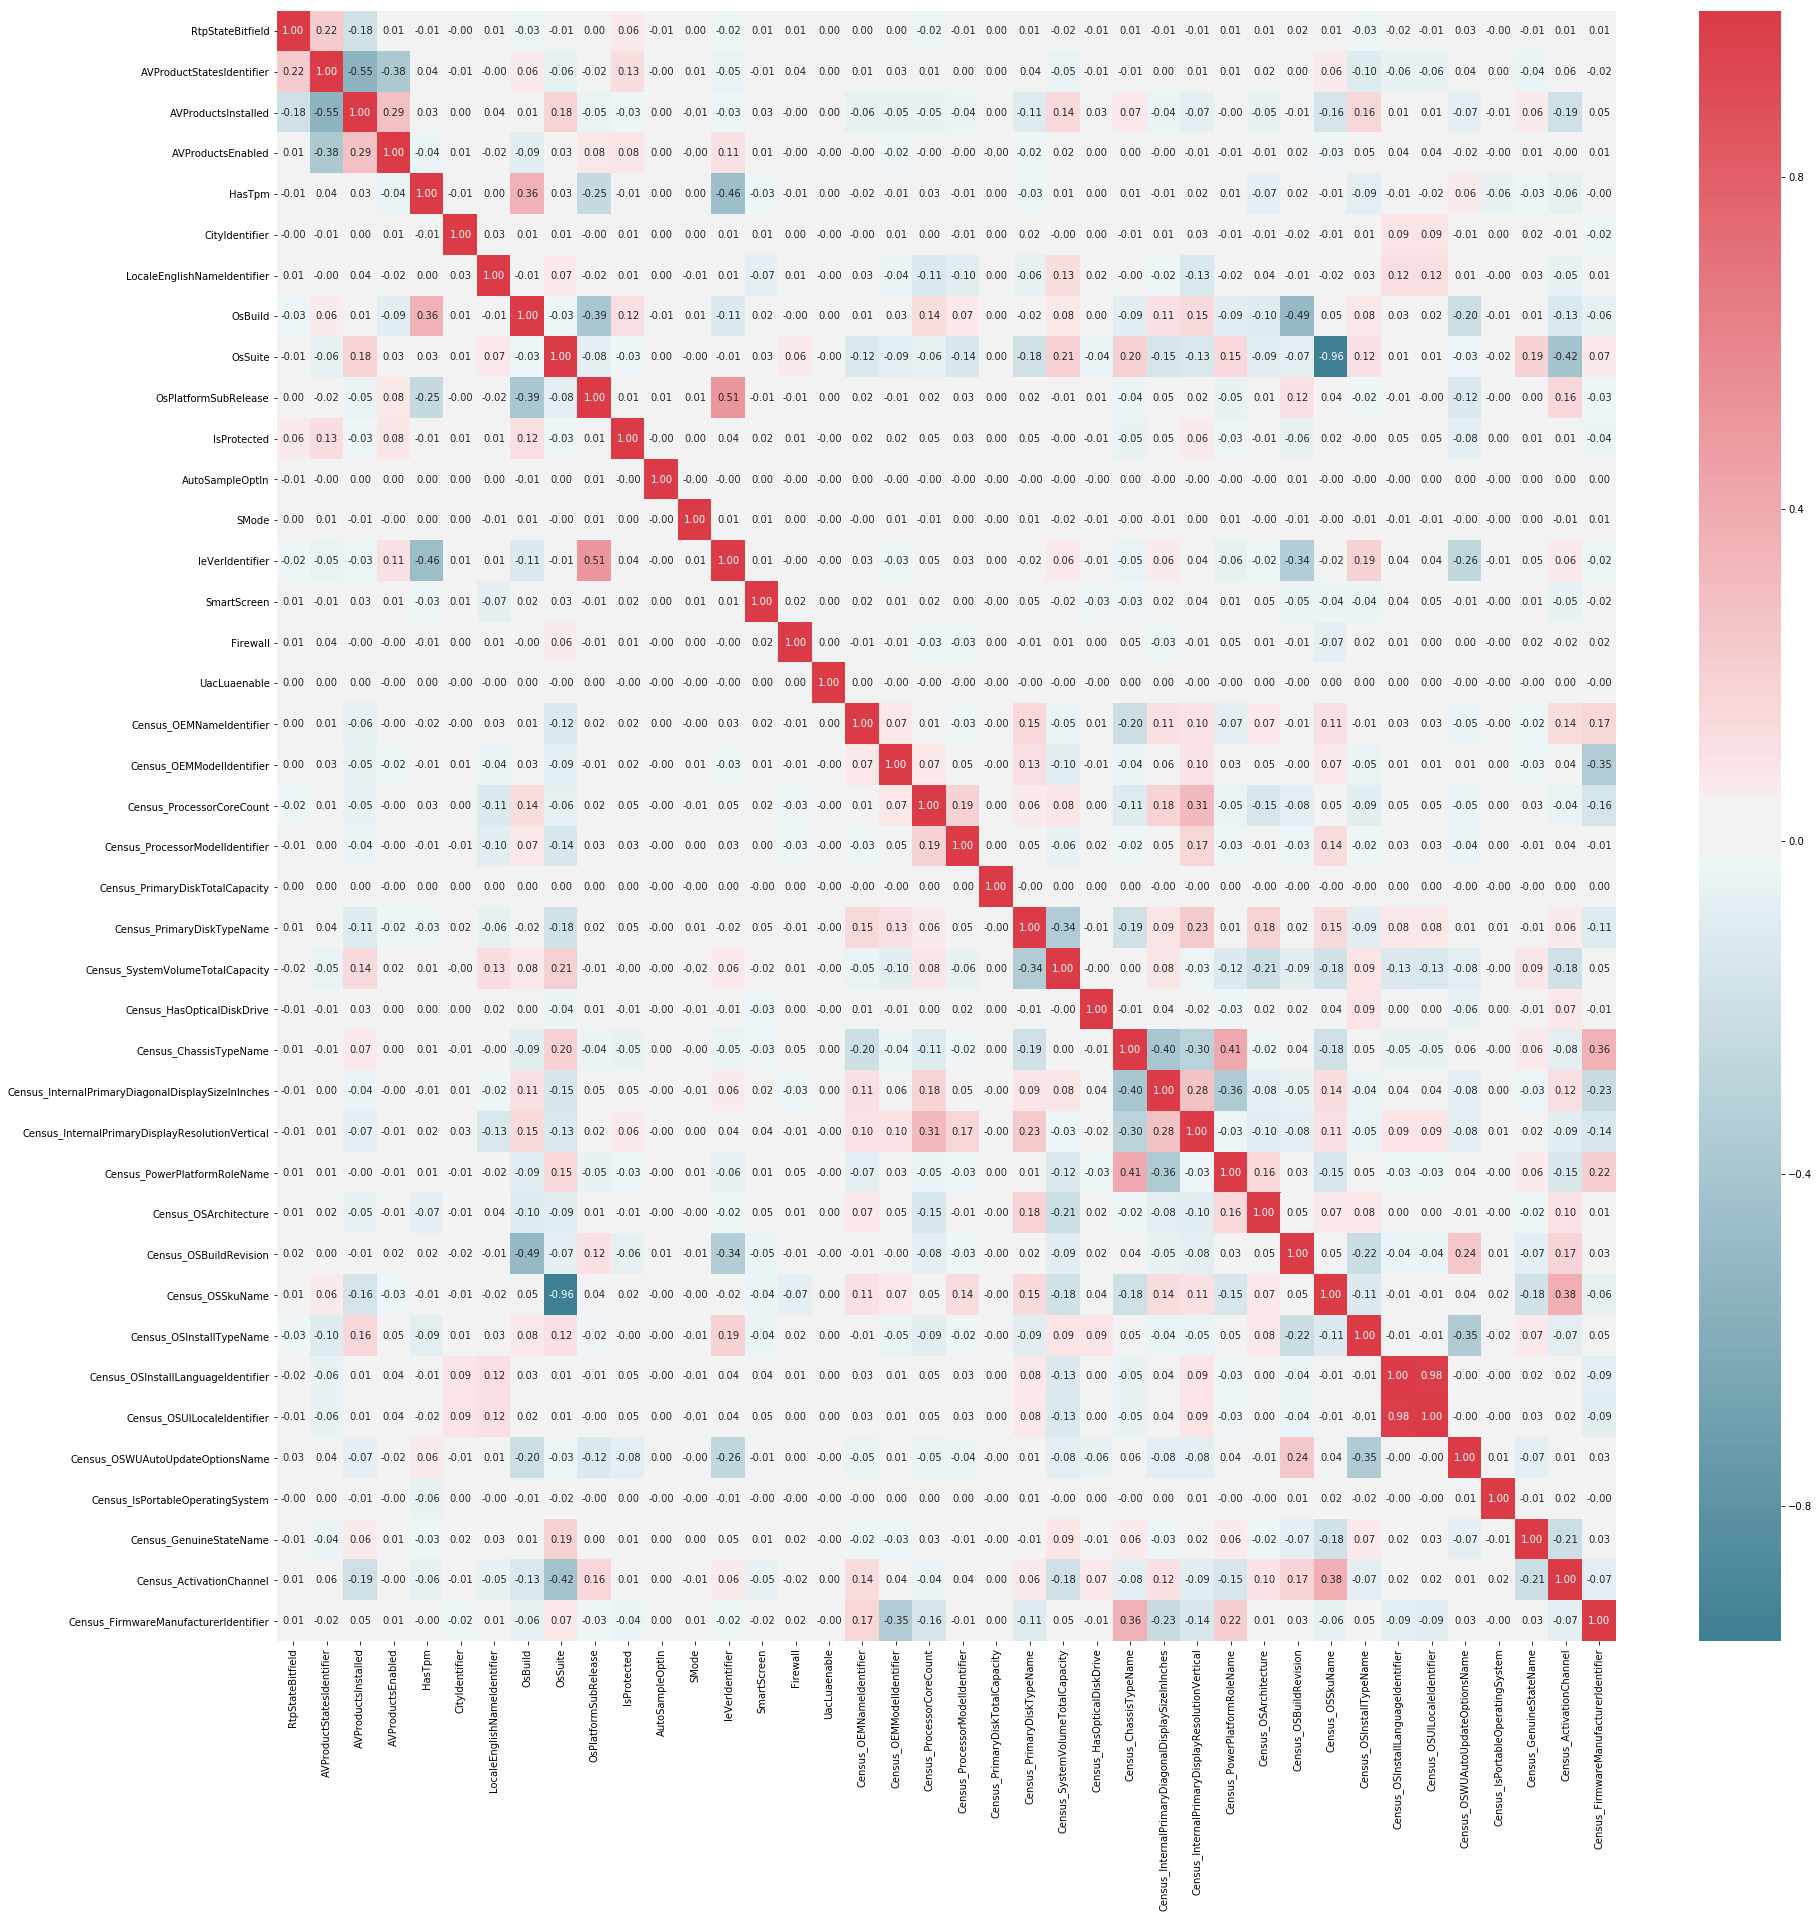

In [316]:
myplot(df[x[0:40]].corr())

In [318]:
df.drop(columns=['IeVerIdentifier','Census_OSBuildRevision','Census_OSUILocaleIdentifier','Census_IsSecureBootEnabled','Census_OSSkuName'],inplace=True)

In [320]:
x=[]
for col in df.select_dtypes(exclude=['object','category']).columns:
    if col in list(filter_col4+filter_col1+filter_col2+filter_col3):
        pass
    else:
        x.append(col) 

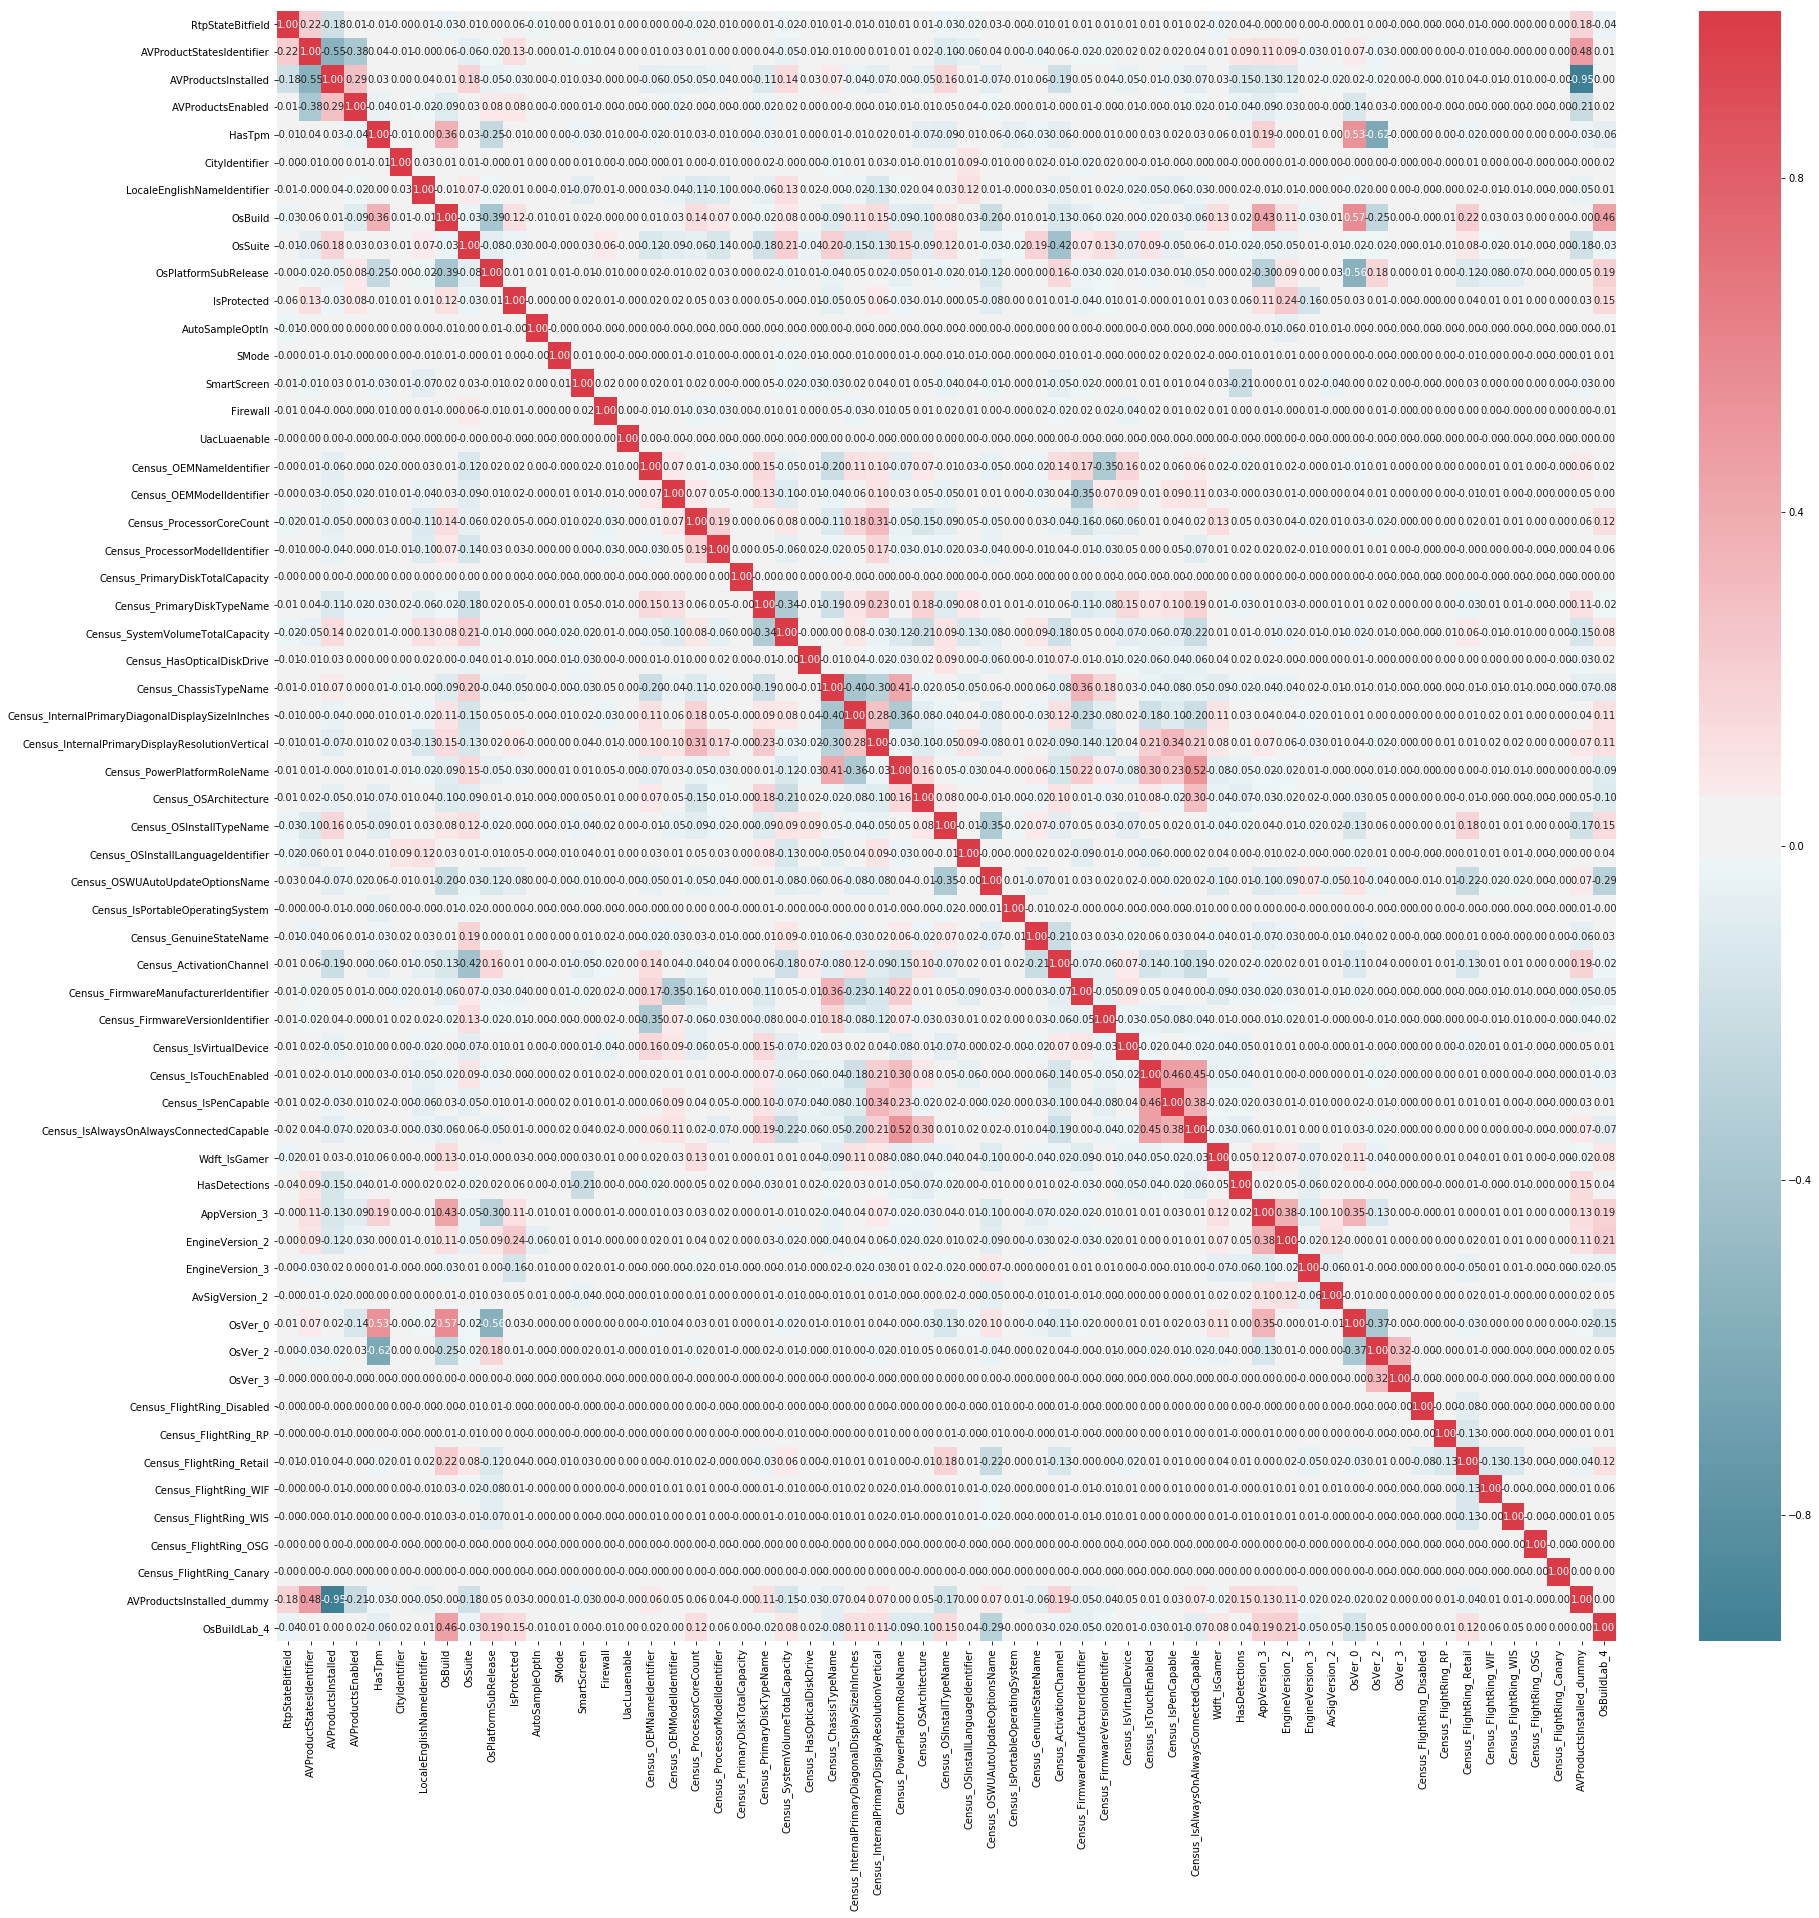

In [322]:
myplot(df[x].corr())

In [323]:
df.drop(columns=['AVProductsInstalled_dummy','HasTpm','Census_PowerPlatformRoleName','OsVer_0',],inplace=True)

In [326]:
#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_curve,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve

l=[]
for col in df.columns:
    if col=='HasDetections':
        continue
    else:
        l.append(col)
l=l+list(['HasDetections'])

df=df[l]

df.shape

X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

import gc

gc.collect()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [254]:
#nn=MLPClassifier(early_stopping=True,learning_rate_init=0.1,random_state=42,verbose=True,alpha=0.5,hidden_layer_sizes=(2,))#change solver and learning_rate

In [330]:
clf=LGBMClassifier(n_estimators=150,learning_rate=0.15,random_state=42,reg_alpha=0.3,reg_lambda=0.5,silent=False,class_weight='balanced')

In [331]:
%%time
clf.fit(X_train,y_train)

Wall time: 3min 41s


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.15,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=150, n_jobs=-1, num_leaves=31,
        objective=None, random_state=42, reg_alpha=0.3, reg_lambda=0.5,
        silent=False, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [332]:
predictions=clf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [333]:
%%time
prediction_scores=clf.predict_proba(X_test)

Wall time: 11.3 s


In [334]:
%%time
scores=[]
for score in prediction_scores:
    scores.append(score[1])

Wall time: 555 ms


In [335]:
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores))
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))

Accuracy Score :  0.652416
Precision :  0.6595572077619317
Recall :  0.6306438682875827
ROC AUC score :  0.7149634086895438
Confusion Matrix : 
 [[336961 162828]
 [184756 315455]]


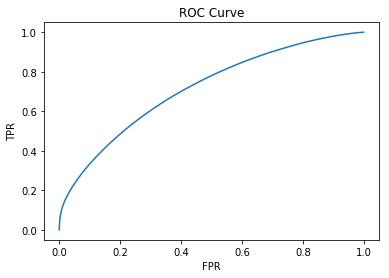

In [336]:
plt.plot(roc_curve(y_test,scores)[0],roc_curve(y_test,scores)[1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [351]:
X.columns[np.argsort(clf.feature_importances_[clf.feature_importances_>0])]

Index(['CountryIdentifier_142', 'CountryIdentifier_94', 'CountryIdentifier_11',
       'CountryIdentifier_85', 'CountryIdentifier_84', 'CountryIdentifier_75',
       'CountryIdentifier_29', 'CountryIdentifier_98', 'CountryIdentifier_73',
       'CountryIdentifier_67',
       ...
       'CountryIdentifier_154', 'LocaleEnglishNameIdentifier',
       'Census_ChassisTypeName', 'EngineVersion_3', 'OsBuild',
       'Census_GenuineStateName', 'AppVersion_3', 'Census_OSArchitecture',
       'SMode', 'Wdft_IsGamer'],
      dtype='object', length=199)

In [352]:
important_cols=X.columns[np.argsort(clf.feature_importances_[clf.feature_importances_>0])]

In [246]:
#from sklearn.preprocessing import PolynomialFeatures

In [247]:
#p=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False).fit(X1)

In [248]:
#X1=pd.DataFrame(data=p.transform(X1),columns=p.get_feature_names(X1.columns))

In [353]:
import gc

In [354]:
gc.collect()

2157

In [355]:
gc.collect()

0

In [357]:
X=X[important_cols]

In [407]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [408]:
X=X[important_cols]

In [409]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [410]:
#clf=XGBClassifier(learning_rate=0.1,n_estimators=50,random_state=42,reg_alpha=0.3,reg_lambda=0.4,silent=False,max_depth=7)
clf=LGBMClassifier(class_weight='balanced',learning_rate=0.1,n_estimators=400,random_state=42,reg_lambda=0.9)

In [411]:
%%time
clf.fit(X_train,y_train)

Wall time: 3min 45s


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=400, n_jobs=-1, num_leaves=31,
        objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.9,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [412]:
predictions=clf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [453]:
prediction_scores1=clf.predict_proba(X_test)

ValueError: Number of features of the model must match the input. Model n_features_ is 199 and input n_features is 165 

In [414]:
%%time
scores1=[]
for score in prediction_scores:
    scores1.append(score[1])

Wall time: 645 ms


In [415]:
print("Accuracy Score : ",accuracy_score(y_test,predictions1))
print("Precision : ",precision_score(y_test,predictions1))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores1))
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions1))

Accuracy Score :  0.65275
Precision :  0.6594882146737374
Recall :  0.6322311984342608
ROC AUC score :  0.715229044082849
Confusion Matrix : 
 [[336501 163288]
 [183962 316249]]


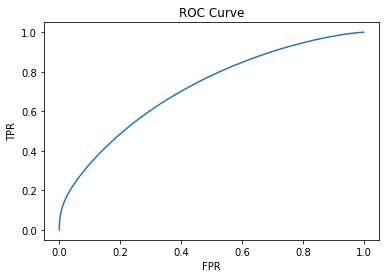

In [416]:
plt.plot(roc_curve(y_test,scores)[0],roc_curve(y_test,scores)[1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [417]:
len(X.columns)

199

In [419]:
X=X[X.columns[np.argsort(clf.feature_importances_[clf.feature_importances_>0])]]

In [420]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [422]:
from sklearn.ensemble import AdaBoostClassifier

In [446]:
clf2=AdaBoostClassifier(learning_rate=0.1,n_estimators=150,random_state=42,algorithm='SAMME')

In [447]:
%%time
clf2.fit(X_train,y_train)

Wall time: 27min 52s


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
          n_estimators=150, random_state=42)

In [448]:
predictions=clf2.predict(X_test)

In [449]:
prediction_scores=clf2.predict_proba(X_test)
scores2=[]
for score in prediction_scores:
    scores.append(score[1])

In [450]:
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores))
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))

Accuracy Score :  0.572152
Precision :  0.8023616322505703
Recall :  0.19194499921033323
ROC AUC score :  0.6162586770918101
Confusion Matrix : 
 [[476139  23650]
 [404198  96013]]


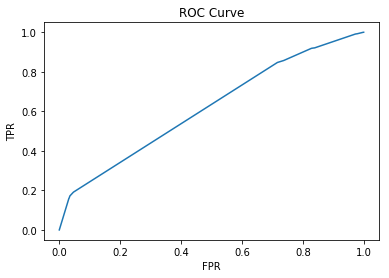

In [451]:
plt.plot(roc_curve(y_test,scores)[0],roc_curve(y_test,scores)[1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [458]:
clf=LGBMClassifier(learning_rate=0.05,n_estimators=200,random_state=42,reg_alpha=0.7,silent=False)

In [459]:
%%time
clf.fit(X_train,y_train)

Wall time: 1min 26s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
        random_state=42, reg_alpha=0.7, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [460]:
predictions3=clf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [461]:
prediction_scores3=clf.predict_proba(X_test)

In [462]:
scores3=[]
for score in prediction_scores3:
    scores3.append(score[1])

In [464]:
print("Accuracy Score : ",accuracy_score(y_test,predictions3))
print("Precision : ",precision_score(y_test,predictions3))
print("Recall : ",recall_score(y_test,predictions3))
print("ROC AUC score : ",roc_auc_score(y_test,scores3))
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions3))

Accuracy Score :  0.605752
Precision :  0.6224765075071951
Recall :  0.5383208286103265
ROC AUC score :  0.6601300750686042
Confusion Matrix : 
 [[336478 163311]
 [230937 269274]]


In [499]:
%%time
final_scores=[]
for x,t in zip(scores,scores3):
    if x>0.5:
        local_var=max(x,t)
        final_scores.append(local_var)
    else:
        local_var=(x+2*t)/3
        final_scores.append(local_var)

Wall time: 684 ms


In [500]:
print("ROC AUC score : ",roc_auc_score(y_test,final_scores))

ROC AUC score :  0.6510550169144815


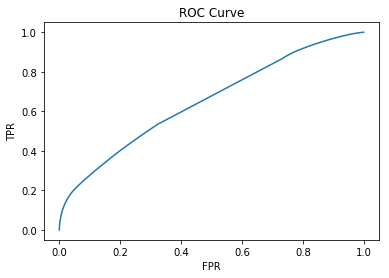

In [501]:
plt.plot(roc_curve(y_test,final_scores)[0],roc_curve(y_test,final_scores)[1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [502]:
from sklearn.metrics import roc_auc_score,roc_curve

In [504]:
gc.collect()

0

In [505]:
#Releasing memory
#del df
#gc.collect()
#df=pd.DataFrame()

In [526]:
%%time
df_test=pd.read_csv("test.csv",dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32'})

Wall time: 4min 54s


In [527]:
solution=pd.DataFrame(data=df_test['MachineIdentifier'],columns=['MachineIdentifier'])

In [528]:
X.columns

Index(['CountryIdentifier_127', 'CountryIdentifier_134',
       'CountryIdentifier_125', 'CountryIdentifier_25',
       'CountryIdentifier_104', 'CountryIdentifier_110',
       'CountryIdentifier_100', 'Firewall', 'CountryIdentifier_30',
       'CountryIdentifier_5',
       ...
       'CountryIdentifier_27', 'CountryIdentifier_148',
       'CountryIdentifier_121', 'Census_SystemVolumeTotalCapacity',
       'CountryIdentifier_143', 'CountryIdentifier_139',
       'CountryIdentifier_136', 'CountryIdentifier_46',
       'CountryIdentifier_101',
       'Census_InternalPrimaryDisplayResolutionVertical'],
      dtype='object', length=165)

In [529]:
#col_list=['SmartScreen','OrganizationIdentifier','CountryIdentifier','Wdft_RegionIdentifier','Census_IsAlwaysOnAlwaysConnectedCapable','Census_OEMModelIdentifier','Census_IsSecureBootEnabled','IsSxsPassiveMode','IeVerIdentifier','Census_FlightRing','SMode','Census_InternalBatteryNumberOfCharges','Census_PrimaryDiskTypeName','Census_GenuineStateName','Census_IsTouchEnabled','Census_ProcessorModelIdentifier', 'Census_OSInstallLanguageIdentifier','Census_OSInstallTypeName', 'IsProtected','Census_ProcessorCoreCount', 'Census_OSUILocaleIdentifier', 'Processor','LocaleEnglishNameIdentifier', 'Census_IsVirtualDevice','Census_OSWUAutoUpdateOptionsName','Census_SystemVolumeTotalCapacity', 'AVProductsEnabled','Census_HasOpticalDiskDrive', 'AVProductStatesIdentifier','OsPlatformSubRelease','Census_InternalPrimaryDisplayResolutionHorizontal', 'OsSuite','OsBuild', 'Census_InternalPrimaryDisplayResolutionVertical','Census_OSBuildRevision','Census_ChassisTypeName','CityIdentifier', 'Census_FirmwareVersionIdentifier', 'OsBuildLab']

In [530]:
col_list=['AutoSampleOptIn','GeoNameIdentifier','Census_FirmwareManufacturerIdentifier','Census_OSEdition','Census_OSBranch','Census_OEMNameIdentifier','SkuEdition', 'Census_MDC2FormFactor','Census_IsVirtualDevice','Firewall','Census_OSSkuName','Census_PowerPlatformRoleName','Census_OSArchitecture','Census_IsPenCapable','Census_IsPortableOperatingSystem','UacLuaenable','Census_ProcessorManufacturerIdentifier','HasTpm','OsVer','OrganizationIdentifier', 'CountryIdentifier','Census_ChassisTypeName','Census_FlightRing','Census_GenuineStateName',
'Census_IsAlwaysOnAlwaysConnectedCapable','Census_OEMModelIdentifier','OsPlatformSubRelease','Census_FirmwareVersionIdentifier',
'AVProductsEnabled', 'SMode','OsBuildLab','Wdft_RegionIdentifier','CityIdentifier','Census_IsSecureBootEnabled','OsSuite', 'IeVerIdentifier',
'IsSxsPassiveMode','Census_SystemVolumeTotalCapacity', 'Census_PrimaryDiskTypeName','Census_InternalBatteryNumberOfCharges', 'Census_IsTouchEnabled',
'Census_HasOpticalDiskDrive', 'Census_OSWUAutoUpdateOptionsName','AVProductStatesIdentifier','Census_OSInstallLanguageIdentifier', 'OsBuild',
'Census_OSBuildRevision', 'Census_ProcessorCoreCount','Census_InternalPrimaryDisplayResolutionHorizontal','Census_OSUILocaleIdentifier',
'Census_InternalPrimaryDisplayResolutionVertical','LocaleEnglishNameIdentifier', 'Processor','Census_IsVirtualDevice','Census_ProcessorModelIdentifier', 'Census_OSInstallTypeName',
'IsProtected','Census_ActivationChannel','Wdft_IsGamer', 'Census_PrimaryDiskTotalCapacity','Census_TotalPhysicalRAM','RtpStateBitfield',
'Census_InternalPrimaryDiagonalDisplaySizeInInches','AVProductsInstalled','SmartScreen','EngineVersion','AppVersion','AvSigVersion']

In [531]:
col_list

['AutoSampleOptIn',
 'GeoNameIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_OSEdition',
 'Census_OSBranch',
 'Census_OEMNameIdentifier',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_IsVirtualDevice',
 'Firewall',
 'Census_OSSkuName',
 'Census_PowerPlatformRoleName',
 'Census_OSArchitecture',
 'Census_IsPenCapable',
 'Census_IsPortableOperatingSystem',
 'UacLuaenable',
 'Census_ProcessorManufacturerIdentifier',
 'HasTpm',
 'OsVer',
 'OrganizationIdentifier',
 'CountryIdentifier',
 'Census_ChassisTypeName',
 'Census_FlightRing',
 'Census_GenuineStateName',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Census_OEMModelIdentifier',
 'OsPlatformSubRelease',
 'Census_FirmwareVersionIdentifier',
 'AVProductsEnabled',
 'SMode',
 'OsBuildLab',
 'Wdft_RegionIdentifier',
 'CityIdentifier',
 'Census_IsSecureBootEnabled',
 'OsSuite',
 'IeVerIdentifier',
 'IsSxsPassiveMode',
 'Census_SystemVolumeTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_InternalBatteryNumberOfCharg

In [532]:
f=[]
for col in col_list:
    if col not in X.columns:
        f.append(col)
    else:
        continue

In [533]:
df_test.shape

(7853253, 82)

In [534]:
df_test.memory_usage().sum()

1890966598

In [535]:
f

['GeoNameIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_OSEdition',
 'Census_OSBranch',
 'Census_OEMNameIdentifier',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_OSSkuName',
 'Census_PowerPlatformRoleName',
 'Census_OSArchitecture',
 'Census_IsPortableOperatingSystem',
 'UacLuaenable',
 'Census_ProcessorManufacturerIdentifier',
 'HasTpm',
 'OsVer',
 'OrganizationIdentifier',
 'CountryIdentifier',
 'Census_ChassisTypeName',
 'Census_FlightRing',
 'Census_GenuineStateName',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Census_OEMModelIdentifier',
 'OsPlatformSubRelease',
 'SMode',
 'OsBuildLab',
 'Wdft_RegionIdentifier',
 'CityIdentifier',
 'Census_IsSecureBootEnabled',
 'OsSuite',
 'IeVerIdentifier',
 'IsSxsPassiveMode',
 'Census_PrimaryDiskTypeName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_HasOpticalDiskDrive',
 'AVProductStatesIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'OsBuild',
 'Census_OSBuildRevision',
 'Census_ProcessorCoreCount',
 'Cens

In [536]:
d=[]
for col in df_test.columns:
    if col in col_list:
        continue
    else:
        d.append(col)

In [537]:
d

['MachineIdentifier',
 'ProductName',
 'IsBeta',
 'DefaultBrowsersIdentifier',
 'Platform',
 'PuaMode',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBuildNumber',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [538]:
df_test.memory_usage().sum()

1890966598

In [539]:
df_test.drop(columns=d,inplace=True)

In [540]:
df_test.memory_usage().sum()

1256970616

In [541]:
null_cols=df_test.columns[df_test.isnull().any()]

In [542]:
null_cols

Index(['RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'OsBuildLab', 'IsProtected', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryNumberOfCharges',
       'Census_OSEdition', 'Census_OSInstallLanguageIdentifier',
       'Census_GenuineStateName', 'Cens

In [543]:
#f=[]
for col in null_cols:
    #if col in X.columns:
    df_test[col].fillna(column_value_replacements[col],inplace=True)
    #else:
    #    f.append(col)

In [544]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [545]:
set(X.columns)-set(df_test.columns)

{'AvSigVersion_2',
 'CountryIdentifier_1',
 'CountryIdentifier_10',
 'CountryIdentifier_100',
 'CountryIdentifier_101',
 'CountryIdentifier_102',
 'CountryIdentifier_103',
 'CountryIdentifier_104',
 'CountryIdentifier_105',
 'CountryIdentifier_106',
 'CountryIdentifier_107',
 'CountryIdentifier_108',
 'CountryIdentifier_109',
 'CountryIdentifier_11',
 'CountryIdentifier_110',
 'CountryIdentifier_111',
 'CountryIdentifier_112',
 'CountryIdentifier_113',
 'CountryIdentifier_114',
 'CountryIdentifier_115',
 'CountryIdentifier_116',
 'CountryIdentifier_117',
 'CountryIdentifier_118',
 'CountryIdentifier_119',
 'CountryIdentifier_12',
 'CountryIdentifier_120',
 'CountryIdentifier_121',
 'CountryIdentifier_122',
 'CountryIdentifier_123',
 'CountryIdentifier_124',
 'CountryIdentifier_125',
 'CountryIdentifier_126',
 'CountryIdentifier_127',
 'CountryIdentifier_128',
 'CountryIdentifier_129',
 'CountryIdentifier_13',
 'CountryIdentifier_130',
 'CountryIdentifier_131',
 'CountryIdentifier_132',

In [310]:
#df_test['OsVer']=df_test['Wdft_RegionIdentifier'].astype('int32')

#temp1=df_test.OsVer.str.split(".",expand=True,)

#temp1.drop(columns=[1,2,3],inplace=True)

#temp1.rename(columns={0:'OsVer_0'},inplace=True)

#df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [311]:
df_test['Wdft_RegionIdentifier']=df_test['Wdft_RegionIdentifier'].astype('int32')

temp1=df_test.OsBuildLab.str.split(".",expand=True,)

temp1.drop(columns=[0,2],inplace=True)

temp1.rename(columns={1:'OsBuildLab_1',3:'OsBuildLab_3',4:'OsBuildLab_4'},inplace=True)

df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [313]:
df_test.columns

Index(['EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Processor', 'OsVer', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition',
       'IsProtected', 'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall',
       'UacLuaenable', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 

In [314]:
temp1=df_test.AppVersion.str.split(".",expand=True,)

In [315]:
temp1.drop(columns=[0],inplace=True)

In [316]:
temp1.rename(columns={1:'AppVersion_1',2:'AppVersion_2',3:'AppVersion_3'},inplace=True)

In [317]:
df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [546]:
temp1=df_test.AvSigVersion.str.split(".",expand=True,)

In [547]:
temp1.head()

,0,1,2,3
0,1,281,501,0
1,1,279,301,0
2,1,277,230,0
3,1,281,664,0
4,1,279,236,0


In [548]:
temp1.drop(columns=[0,1,3],inplace=True)

In [549]:
temp1.rename(columns={2:'AvSigVersion_2'},inplace=True)

In [550]:
df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [551]:
temp1=df_test.EngineVersion.str.split(".",expand=True,)

In [552]:
temp1.drop(columns=[0,1,3],inplace=True)

In [553]:
temp1.rename(columns={2:'EngineVersion_2'},inplace=True)

In [554]:
df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [555]:
%%time
df_test=pd.get_dummies(data=df_test,columns=['CountryIdentifier'],dtype='int8')

Wall time: 34 s


In [556]:
df_test.shape

(7853253, 290)

In [557]:
set(X.columns)-set(df_test.columns)

set()

In [558]:
d=[]
for col in df_test.columns:
    if col in X.columns:
        continue
    else:
        d.append(col)

In [559]:
df_test.memory_usage().sum()

3094631818

In [560]:
%%time
df_test.drop(columns=d,inplace=True)

Wall time: 5.12 s


In [561]:
df_test.memory_usage().sum()

1554945190

In [562]:
print("Shape of Training Data : ",X.shape)
print("Shape of test data : ",df_test.shape)

Shape of Training Data :  (5000000, 165)
Shape of test data :  (7853253, 165)


In [563]:
df_test.select_dtypes(include=['category','object']).columns

Index(['SmartScreen', 'Census_OSWUAutoUpdateOptionsName', 'AvSigVersion_2',
       'EngineVersion_2'],
      dtype='object')

In [564]:
df_test[df_test.select_dtypes(include=['category','object']).columns].head()

,SmartScreen,Census_OSWUAutoUpdateOptionsName,AvSigVersion_2,EngineVersion_2
0,RequireAdmin,AutoInstallAndRebootAtMaintenanceTime,501,15400
1,RequireAdmin,AutoInstallAndRebootAtMaintenanceTime,301,15400
2,RequireAdmin,UNKNOWN,230,15300
3,RequireAdmin,Notify,664,15400
4,RequireAdmin,UNKNOWN,236,15400


In [565]:
#df_test[df_test['OsBuildLab_1']=='1*amd64fre']

In [566]:
df_test.isnull().sum().sort_values(ascending=False)

CountryIdentifier_153    0
CountryIdentifier_48     0
CountryIdentifier_46     0
CountryIdentifier_45     0
CountryIdentifier_44     0
CountryIdentifier_43     0
CountryIdentifier_42     0
CountryIdentifier_41     0
CountryIdentifier_40     0
CountryIdentifier_39     0
CountryIdentifier_38     0
CountryIdentifier_37     0
CountryIdentifier_36     0
CountryIdentifier_35     0
CountryIdentifier_34     0
CountryIdentifier_33     0
CountryIdentifier_32     0
CountryIdentifier_31     0
CountryIdentifier_30     0
CountryIdentifier_47     0
CountryIdentifier_49     0
CountryIdentifier_69     0
CountryIdentifier_50     0
CountryIdentifier_67     0
CountryIdentifier_66     0
CountryIdentifier_65     0
CountryIdentifier_64     0
CountryIdentifier_63     0
CountryIdentifier_62     0
CountryIdentifier_61     0
                        ..
CountryIdentifier_80     0
CountryIdentifier_79     0
CountryIdentifier_78     0
CountryIdentifier_77     0
CountryIdentifier_76     0
CountryIdentifier_75     0
C

In [349]:
%%time
for col in df_test.select_dtypes(include=['category','object']).columns:
    if col in le.keys():
        continue
    else:
        df_test[col]=df_test[col].astype('int32')

Wall time: 7.54 s


In [567]:
df_test.select_dtypes(include=['category','object']).columns

Index(['SmartScreen', 'Census_OSWUAutoUpdateOptionsName', 'AvSigVersion_2',
       'EngineVersion_2'],
      dtype='object')

In [568]:
for col in df_test.select_dtypes(include=['category','object']).columns:
    if col in le.keys():
        try:
            df_test[col]=le[col].fit_transform(df_test[col])
        except:
            print("Exception : ",col)
    else:
        print(col)

AvSigVersion_2
EngineVersion_2


In [353]:
#df_test['OsBuildLab_4']=le['OsBuildLab_4'].fit_transform(df_test['OsBuildLab_4'])

In [569]:
df_test[X.columns].head()

,CountryIdentifier_127,CountryIdentifier_134,CountryIdentifier_125,CountryIdentifier_25,CountryIdentifier_104,CountryIdentifier_110,CountryIdentifier_100,Firewall,CountryIdentifier_30,CountryIdentifier_5,...,CountryIdentifier_27,CountryIdentifier_148,CountryIdentifier_121,Census_SystemVolumeTotalCapacity,CountryIdentifier_143,CountryIdentifier_139,CountryIdentifier_136,CountryIdentifier_46,CountryIdentifier_101,Census_InternalPrimaryDisplayResolutionVertical
0,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,123179.0,0,0,0,0,0,1080.0
1,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,1882352.0,0,0,0,0,0,768.0
2,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,28678.0,0,0,0,0,0,720.0
3,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,439345.0,0,0,0,0,0,768.0
4,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,461506.0,0,0,0,0,0,768.0


In [571]:
gc.collect()

0

In [572]:
for col in df_test.columns:
    if df_test[col].nunique()==2:
        df_test[col]=df_test[col].astype('int8')
    else:
        print(col)
        continue

AVProductsEnabled
SmartScreen
Census_SystemVolumeTotalCapacity
Census_InternalPrimaryDisplayResolutionVertical
Census_OSWUAutoUpdateOptionsName
Census_FirmwareVersionIdentifier
AvSigVersion_2
EngineVersion_2


In [361]:
#Releasing memory
del [t,u,v,w,z,a,b,c,d,e]
gc.collect()
t=pd.DataFrame()
u=pd.DataFrame()
v=pd.DataFrame()
w=pd.DataFrame()
z=pd.DataFrame()
a=pd.DataFrame()
b=pd.DataFrame()
c=pd.DataFrame()
d=pd.DataFrame()
e=pd.DataFrame()

In [574]:
gc.collect()

0

In [580]:
df_test['AvSigVersion_2']=df_test.AvSigVersion_2.astype('int32')
df_test['EngineVersion_2']=df_test.EngineVersion_2.astype('int32')

In [581]:
%%time
final_scores_clf=clf.predict_proba(df_test[X.columns])
final_scores_clf2=clf2.predict_proba(df_test[X.columns])

Wall time: 9min 17s


In [582]:
%%time
scores_clf=[]
scores_clf2=[]
for score in final_scores_clf:
    scores_clf.append(score[1])
for score in final_scores_clf2:
    scores_clf2.append(score[1])

Wall time: 12.1 s


In [583]:
%%time
final_scores=[]
for x,t in zip(scores_clf2,scores_clf):
    if x>0.5:
        local_var=max(x,t)
        final_scores.append(local_var)
    else:
        local_var=(x+2*t)/3
        final_scores.append(local_var)

Wall time: 6.19 s


In [585]:
solution['HasDetections']=final_scores

In [586]:
%%time
solution.to_csv("EDA_v3_FE_V9_solution16.csv",index=False)

Wall time: 53.5 s


In [589]:
gc.collect()

0

In [590]:
from xgboost import XGBClassifier

In [592]:
xgb=XGBClassifier(learning_rate=0.1,n_estimators=150,max_depth=7,reg_lambda=0.7,silent=False,random_state=42)

In [593]:
%%time
xgb.fit(X_train,y_train)

[13:48:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=7
[13:49:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=7
[13:50:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=7
[13:51:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=7
[13:52:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=7
[13:53:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=7
[13:54:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[14:42:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[14:43:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=7
[14:44:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=7
[14:45:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=7
[14:46:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=7
[14:47:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=7
[14:48:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[15:28:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=7
[15:28:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=7
[15:29:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[15:30:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=7
[15:30:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=7
[15:31:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=7
[15:31:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=0.7, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [594]:
%%time
prediction_scores=xgb.predict_proba(X_test)

Wall time: 18.6 s


In [595]:
%time
predictons_xgb=xgb.predict(X_test)

Wall time: 0 ns


C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [596]:
%%time
scores_xgb=[]
for score in prediction_scores:
    scores_xgb.append(score[1])

Wall time: 486 ms


In [598]:
print("Accuracy Score : ",accuracy_score(y_test,predictons_xgb))
print("Precision : ",precision_score(y_test,predictons_xgb))
print("Recall : ",recall_score(y_test,predictons_xgb))
print("ROC AUC score : ",roc_auc_score(y_test,scores_xgb))
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictons_xgb))

Accuracy Score :  0.606574
Precision :  0.6248652365172205
Recall :  0.5341605842334535
ROC AUC score :  0.6611603004180711
Confusion Matrix : 
 [[339381 160408]
 [233018 267193]]


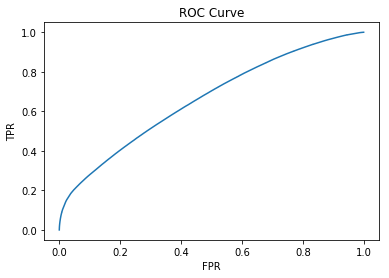

In [600]:
plt.plot(roc_curve(y_test,scores_xgb)[0],roc_curve(y_test,scores_xgb)[1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()